In [1]:
#pip install bs4
#pip install yahoo_fin
import bs4 as bs
import pickle
import requests
import re
import json
from io import StringIO
from bs4 import BeautifulSoup
import yahoo_fin.stock_info as si
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data Preparing

### Import data

Showing basic financial information through single stock: Amazon

Using Yahoo finance package(yahoo_fin) to scrape stock price and its relevant accounting information for later portfdolio selsction

In [3]:
amazon_example=si.get_data('AMZN',start_date ="01-01-2012",end_date = "01-01-2018")
amazon_example
#amazon_example.to_csv(r'/Users/apple/Desktop/Second Version/Data/amazon.csv',index = True, header=True)
#"01-01-2010",end_date = "30-11-2016"
# "01-01-2010",end_date = "30-11-2017" lower sharp ratio

,open,high,low,close,adjclose,volume,ticker
2012-01-03,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,AMZN
2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,AMZN
2012-01-05,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,AMZN
2012-01-06,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,AMZN
2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,AMZN
...,...,...,...,...,...,...,...
2017-12-22,1172.079956,1174.619995,1167.829956,1168.359985,1168.359985,1585100,AMZN
2017-12-26,1168.359985,1178.319946,1160.550049,1176.760010,1176.760010,2005200,AMZN
2017-12-27,1179.910034,1187.290039,1175.609985,1182.260010,1182.260010,1867200,AMZN
2017-12-28,1189.000000,1190.099976,1184.380005,1186.099976,1186.099976,1841700,AMZN


### Stock Price Visualization

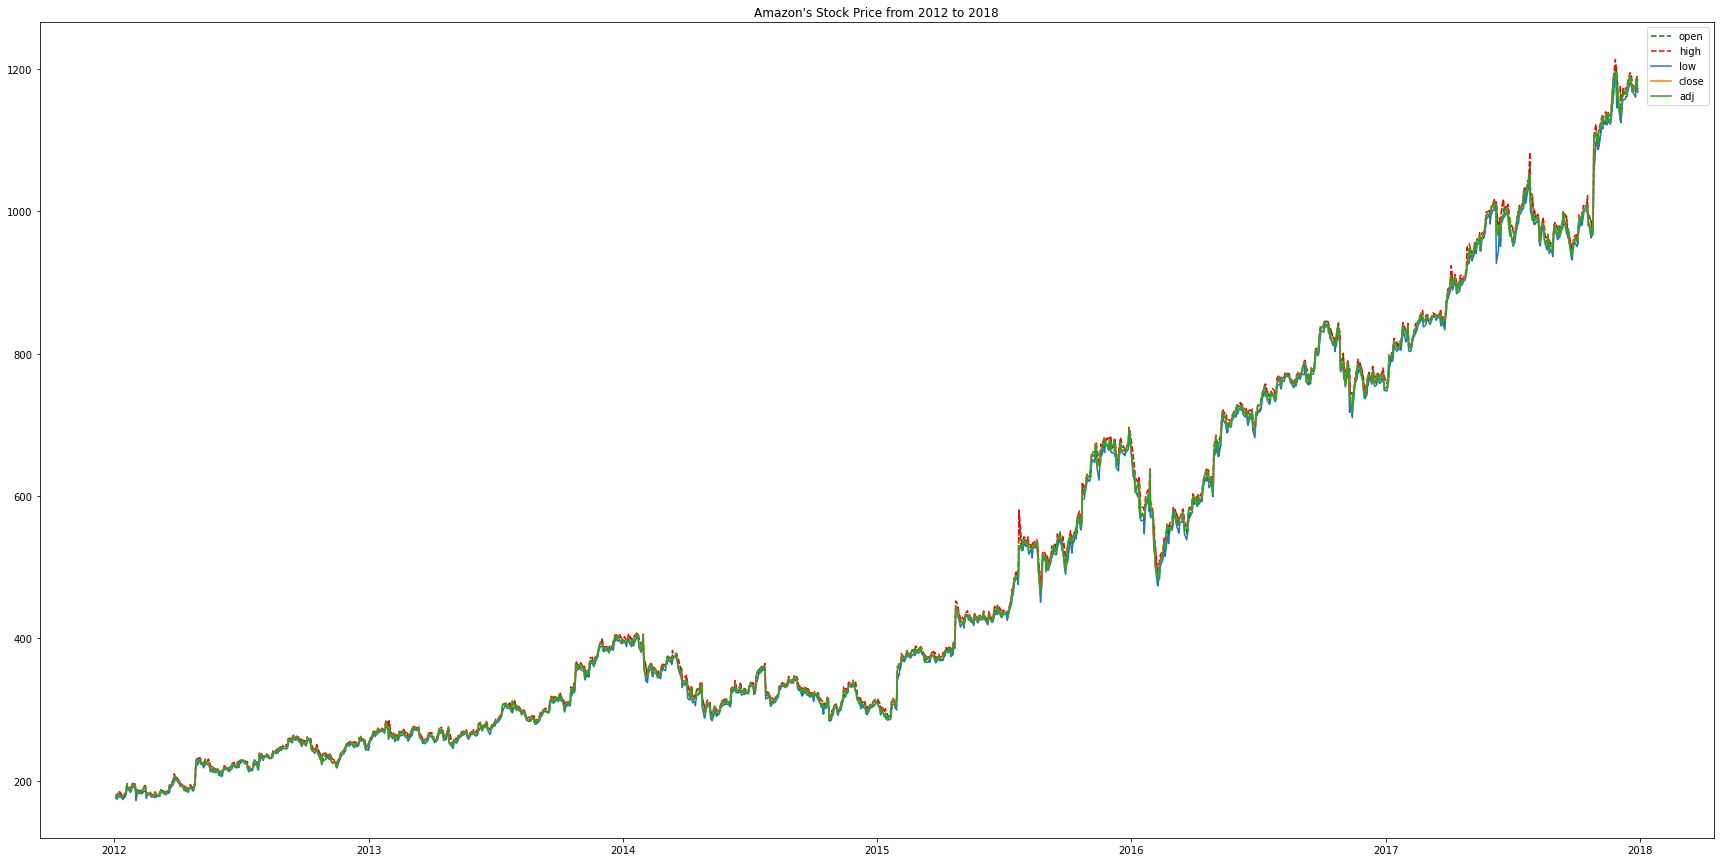

In [4]:
plt.figure(figsize=(30,15))
plt.plot(amazon_example['open'], 'g--', label="open")
plt.plot(amazon_example['high'], 'r--', label="high")
plt.plot(amazon_example['low'], label="low")
plt.plot(amazon_example['close'], label="close")
plt.plot(amazon_example['adjclose'], label="adj")
plt.legend()
plt.title("Amazon's Stock Price from 2012 to 2018")
#plt.savefig('/Users/apple/Desktop/Second Version/Figure/price.png')
plt.show()

In [5]:
si.get_stats('AMZN')

,Attribute,Value
0,Beta (5Y Monthly),1.15
1,52-Week Change 3,21.96%
2,S&P500 52-Week Change 3,35.72%
3,52 Week High 3,3773.08
4,52 Week Low 3,2871.00
5,50-Day Moving Average 3,3523.47
6,200-Day Moving Average 3,3298.96
7,Avg Vol (3 month) 3,3.59M
8,Avg Vol (10 day) 3,2.99M
9,Shares Outstanding 5,504.32M


Stocks' ticker in Dow 30 Portfolio 

In [6]:
dow = si.tickers_dow()
dow.remove("DOW")
dow

['AAPL',
 'AMGN',
 'AXP',
 'BA',
 'CAT',
 'CRM',
 'CSCO',
 'CVX',
 'DIS',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'TRV',
 'UNH',
 'V',
 'VZ',
 'WBA',
 'WMT']

### Transforming data into Dataframe

In [7]:
# Forming data and save into csv
price = pd.DataFrame()
for i in range(len(dow)):
    t = str(dow[i])
    adj = si.get_data(t,start_date ="01-01-2012",end_date = "01-01-2018")
    adj_n=adj.drop(['open','high','low','close','volume','ticker'],axis=1)
    adj_f=adj_n.T
    price=price.append(adj_f)
    
price.index = dow
#price.to_csv('/Users/apple/Desktop/Second Version/Data/dow_final_dataset.csv',index = True, header=True)

In [8]:
price
#price.to_csv('/Users/apple/Desktop/Second Version/Data/dow_final_dataset.csv',index = True, header=True)

,2012-01-03,2012-01-04,2012-01-05,2012-01-06,2012-01-09,2012-01-10,2012-01-11,2012-01-12,2012-01-13,2012-01-17,...,2017-12-15,2017-12-18,2017-12-19,2017-12-20,2017-12-21,2017-12-22,2017-12-26,2017-12-27,2017-12-28,2017-12-29
AAPL,12.629209,12.697079,12.838044,12.972249,12.951672,12.998045,12.976856,12.941231,12.892705,13.042884,...,41.720161,42.307701,41.856853,41.811283,41.969559,41.969559,40.904797,40.911991,41.027103,40.583443
AMGN,50.900780,50.622887,51.138962,51.416855,50.972233,52.139359,52.718941,53.624054,53.671700,54.044853,...,160.096573,159.282684,159.942841,160.159882,159.771027,159.535904,159.237503,159.346008,158.477875,157.257080
AXP,41.973820,41.999939,42.487499,42.026047,42.130535,42.374313,42.618092,43.227558,43.323330,43.723816,...,93.171707,94.268753,93.767525,93.162270,93.152802,93.379768,93.218979,93.748596,94.287659,93.918839
BA,60.731094,60.821095,60.166485,60.534698,60.984760,61.369335,61.156593,61.786644,61.042030,61.565697,...,280.122711,282.219330,283.277130,283.896545,281.161499,281.228210,281.475922,281.723694,282.419434,281.047150
CAT,71.366081,72.026733,72.535507,72.717751,73.735306,75.907143,75.664116,77.410698,77.820755,78.496605,...,133.406937,136.208008,137.244797,138.708984,140.636993,141.646500,142.274017,143.256241,144.074753,143.310791
CRM,25.299999,24.370001,24.692499,25.264999,25.187500,26.197500,26.455000,26.420000,25.975000,25.860001,...,105.480003,105.080002,104.260002,103.389999,103.620003,102.629997,102.540001,102.650002,102.790001,102.230003
CSCO,13.938757,14.208104,14.155733,14.103362,14.193146,14.088400,14.267963,14.327820,14.260481,14.447522,...,34.083557,34.342373,34.181725,34.574417,34.386997,34.404850,34.342373,34.413773,34.440544,34.181725
CVX,74.992943,74.863831,74.130028,73.593224,74.395012,74.102829,73.226318,71.323799,72.084831,72.512871,...,102.129402,102.103821,102.223221,103.118874,106.471146,106.607620,107.460632,107.093857,107.119431,106.786774
DIS,34.300621,34.784103,35.366081,35.733170,35.589909,35.482471,34.649811,34.676659,34.381199,34.452824,...,108.210625,107.977226,108.735779,106.674072,106.557365,105.682114,105.147240,104.680435,104.806862,104.554008
GS,82.177017,81.642738,81.504868,80.505211,81.599632,84.736420,85.968742,87.218277,85.279320,84.176277,...,240.942795,243.612900,240.296295,239.078339,244.540512,242.629181,241.458038,239.799728,240.315063,238.684814


In [9]:
# Final Price matrix between 2012 to 2018
price_1=price.T
price_1
#price_1.to_csv('/Users/apple/Desktop/Second Version/Data/price_1.csv',index = True, header=True)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2012-01-03,12.629209,50.900780,41.973820,60.731094,71.366081,25.299999,13.938757,74.992943,34.300621,82.177017,...,26.851942,21.749044,21.651094,49.722237,46.989967,44.366604,24.080502,25.648050,25.911947,48.266403
2012-01-04,12.697079,50.622887,41.999939,60.821095,72.026733,24.370001,14.208104,74.863831,34.784103,81.642738,...,26.879980,22.260885,21.966444,49.699913,46.798809,45.012848,23.650280,25.312347,25.731672,47.770382
2012-01-05,12.838044,51.138962,42.487499,60.166485,72.535507,24.692499,14.155733,74.130028,35.366081,81.504868,...,27.160418,22.488358,21.953026,49.491585,47.260815,45.314415,23.827976,25.138060,25.645460,47.538368
2012-01-06,12.972249,51.416855,42.026047,60.534698,72.717751,25.264999,14.103362,73.593224,35.733170,80.505211,...,26.971123,22.837715,21.915005,49.372551,47.276733,45.478138,23.547411,25.066118,25.927622,47.202354
2012-01-09,12.951672,50.972233,42.130535,60.984760,73.735306,25.187500,14.193146,74.395012,35.589909,81.599632,...,26.915039,22.537107,21.995516,49.580853,47.547569,45.426437,23.358013,25.092274,26.256807,47.346355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,41.969559,159.535904,93.379768,281.228210,141.646500,102.629997,34.404850,106.607620,105.682114,242.629181,...,48.387638,81.585175,61.094822,82.911049,123.544693,208.499496,110.218460,45.182446,64.744362,91.739983
2017-12-26,40.904797,159.237503,93.218979,281.475922,142.274017,102.540001,34.342373,107.460632,105.147240,241.458038,...,48.370468,81.480217,61.442352,83.226028,123.903236,208.120407,110.511879,45.207939,65.269730,92.627419
2017-12-27,40.911991,159.346008,93.748596,281.723694,143.256241,102.650002,34.413773,107.093857,104.680435,239.799728,...,48.370468,81.775978,60.766632,82.884056,123.894051,208.897537,111.519279,45.258907,64.877930,92.720818
2017-12-28,41.027103,158.477875,94.287659,282.419434,144.074753,102.790001,34.440544,107.119431,104.806862,240.315063,...,48.593693,81.785538,60.766632,82.857048,124.712212,211.124710,111.842049,45.386318,64.949150,92.851616


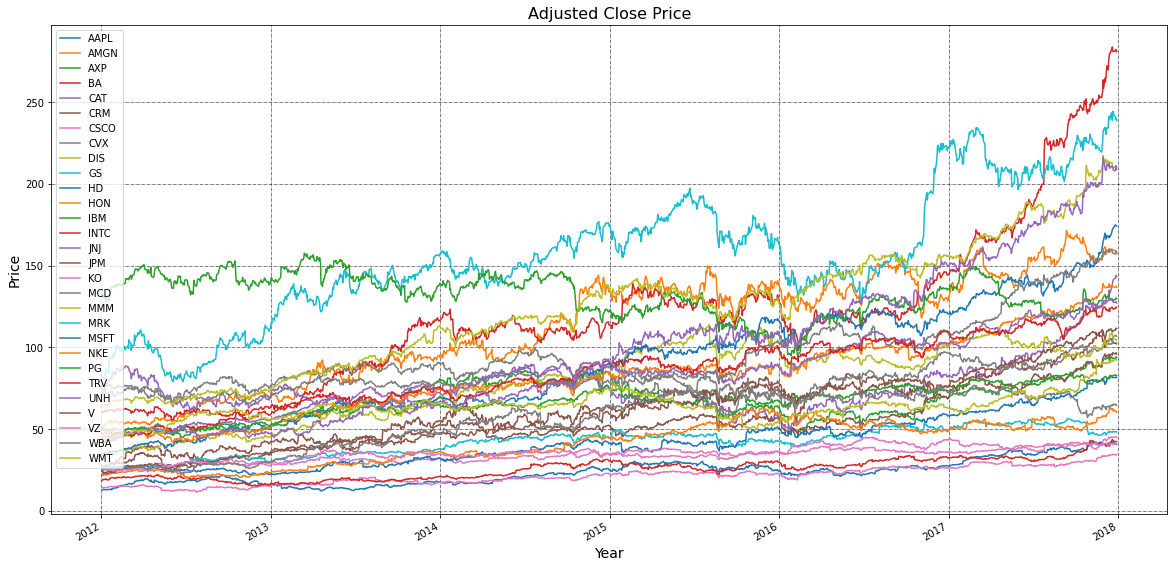

In [10]:
# Plot all the adjclose prices
price_1.iloc[:,:30].plot(figsize=(20, 10))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
#plt.savefig('/Users/apple/Desktop/Second Version/Figure/adj_price.png')
plt.show()

### Daily Return Stock Matrix

In [11]:
# Calculating the daily return and drop null cell
price_1_return=price_1.pct_change().dropna()
price_1_return
#price_1_return.to_csv('/Users/apple/Desktop/Second Version/Data/price_1_return.csv',index = True, header=True)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2012-01-04,0.005374,-0.005460,0.000622,0.001482,0.009257,-0.036759,0.019324,-0.001722,0.014095,-0.006502,...,0.001044,0.023534,0.014565,-0.000449,-0.004068,0.014566,-0.017866,-0.013089,-0.006957,-0.010277
2012-01-05,0.011102,0.010195,0.011609,-0.010763,0.007064,0.013233,-0.003686,-0.009802,0.016731,-0.001689,...,0.010433,0.010218,-0.000611,-0.004192,0.009872,0.006700,0.007513,-0.006885,-0.003350,-0.004857
2012-01-06,0.010454,0.005434,-0.010861,0.006120,0.002512,0.023185,-0.003700,-0.007241,0.010380,-0.012265,...,-0.006970,0.015535,-0.001732,-0.002405,0.000337,0.003613,-0.011775,-0.002862,0.011002,-0.007068
2012-01-09,-0.001586,-0.008647,0.002486,0.007435,0.013993,-0.003067,0.006366,0.010895,-0.004009,0.013594,...,-0.002079,-0.013163,0.003674,0.004219,0.005729,-0.001137,-0.008043,0.001043,0.012696,0.003051
2012-01-10,0.003580,0.022897,0.005786,0.006306,0.029455,0.040099,-0.007380,-0.003927,-0.003019,0.038441,...,0.003386,0.003605,0.001220,-0.004652,0.006869,-0.001897,-0.001001,0.005212,0.026866,-0.002366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,0.000000,-0.001472,0.002437,0.000237,0.007178,-0.009554,0.000519,0.001282,-0.008214,-0.007816,...,-0.004240,0.000117,-0.022850,0.005018,-0.000372,-0.007623,0.002491,0.003395,-0.007372,0.001530
2017-12-26,-0.025370,-0.001870,-0.001722,0.000881,0.004430,-0.000877,-0.001816,0.008001,-0.005061,-0.004827,...,-0.000355,-0.001286,0.005688,0.003799,0.002902,-0.001818,0.002662,0.000564,0.008114,0.009673
2017-12-27,0.000176,0.000681,0.005681,0.000880,0.006904,0.001073,0.002079,-0.003413,-0.004440,-0.006868,...,0.000000,0.003630,-0.010998,-0.004109,-0.000074,0.003734,0.009116,0.001127,-0.006003,0.001008
2017-12-28,0.002814,-0.005448,0.005750,0.002470,0.005714,0.001364,0.000778,0.000239,0.001208,0.002149,...,0.004615,0.000117,0.000000,-0.000326,0.006604,0.010662,0.002894,0.002815,0.001098,0.001411


Visualizing the daily return of stock "GS" as example. It flucutates from -0.06 to 0.06 during 2012 to 2018

<AxesSubplot:>

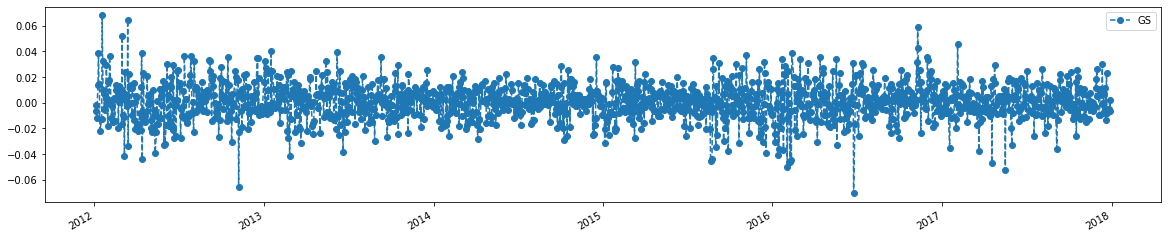

In [12]:
# Daily return figure
price_1_return['GS'].plot(figsize=(20,4),legend=True,linestyle='--',marker='o')
#plt.savefig('/Users/apple/Desktop/Second Version/Figure/daily_return.png')

### Covariance Matrix 

In [13]:
# Creating annualized covariance matrix 
covariance_matrix = price_1_return.iloc[:,:].cov()*252
covariance_matrix
#covariance_matrix.to_csv('/Users/apple/Desktop/Second Version/Data/covariance_matrix.csv',index = True, header=True)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
AAPL,0.061916,0.014907,0.012105,0.014913,0.017472,0.020250,0.015860,0.012008,0.012124,0.017356,...,0.008456,0.018264,0.012399,0.007573,0.008549,0.012861,0.015001,0.006660,0.013393,0.007329
AMGN,0.014907,0.056121,0.017365,0.016403,0.015816,0.023622,0.014608,0.013676,0.016406,0.021678,...,0.020689,0.015836,0.014972,0.011316,0.012910,0.018732,0.019382,0.010568,0.019819,0.009826
AXP,0.012105,0.017365,0.038159,0.015878,0.017776,0.019108,0.012919,0.013115,0.014228,0.023816,...,0.011469,0.014661,0.014456,0.007555,0.011309,0.013009,0.018736,0.008682,0.012508,0.007349
BA,0.014913,0.016403,0.015878,0.042220,0.019722,0.018544,0.014395,0.014607,0.015367,0.021256,...,0.011505,0.014378,0.013772,0.008530,0.012122,0.012997,0.016303,0.009241,0.014051,0.007969
CAT,0.017472,0.015816,0.017776,0.019722,0.053138,0.021272,0.018068,0.023174,0.014275,0.027277,...,0.011303,0.018978,0.012153,0.007913,0.012656,0.011797,0.015285,0.009544,0.012075,0.006504
CRM,0.020250,0.023622,0.019108,0.018544,0.021272,0.096217,0.026329,0.015129,0.019100,0.025504,...,0.013345,0.024628,0.021791,0.008862,0.013027,0.013639,0.024872,0.008392,0.019950,0.007721
CSCO,0.015860,0.014608,0.012919,0.014395,0.018068,0.026329,0.047063,0.014829,0.014267,0.019035,...,0.011483,0.019794,0.011850,0.008515,0.010904,0.011057,0.014706,0.008293,0.011942,0.008324
CVX,0.012008,0.013676,0.013115,0.014607,0.023174,0.015129,0.014829,0.038503,0.012879,0.020553,...,0.012298,0.014684,0.009623,0.010005,0.012199,0.011446,0.013495,0.010480,0.011709,0.006424
DIS,0.012124,0.016406,0.014228,0.015367,0.014275,0.019100,0.014267,0.012879,0.033153,0.018958,...,0.010465,0.014007,0.014482,0.008949,0.012153,0.011845,0.015064,0.009852,0.013100,0.008265
GS,0.017356,0.021678,0.023816,0.021256,0.027277,0.025504,0.019035,0.020553,0.018958,0.052546,...,0.015562,0.019975,0.016360,0.008858,0.017064,0.016663,0.020912,0.010506,0.016644,0.007925


In [14]:
correlation_matrix = price_1_return.iloc[:,:29].corr()
correlation_matrix

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
AAPL,1.000000,0.252882,0.249035,0.291671,0.304596,0.262363,0.293800,0.245931,0.267594,0.304280,...,0.184542,0.331995,0.227042,0.220460,0.224977,0.256697,0.297570,0.168812,0.226769,0.173541
AMGN,0.252882,1.000000,0.375254,0.336976,0.289623,0.321458,0.284231,0.294208,0.380348,0.399200,...,0.474227,0.302371,0.287957,0.345996,0.356857,0.392698,0.403840,0.281355,0.352480,0.244374
AXP,0.249035,0.375254,1.000000,0.395578,0.394765,0.315347,0.304858,0.342165,0.400018,0.531870,...,0.318820,0.339471,0.337171,0.280164,0.379091,0.330732,0.473426,0.280328,0.269763,0.221664
BA,0.291671,0.336976,0.395578,1.000000,0.416384,0.290953,0.322937,0.362283,0.410747,0.451295,...,0.304044,0.316504,0.305380,0.300704,0.386304,0.314135,0.391628,0.283642,0.288110,0.228515
CAT,0.304596,0.289623,0.394765,0.416384,1.000000,0.297496,0.361289,0.512342,0.340103,0.516213,...,0.266247,0.372380,0.240201,0.248661,0.359524,0.254164,0.327288,0.261117,0.220698,0.166239
CRM,0.262363,0.321458,0.315347,0.290953,0.297496,1.000000,0.391255,0.248572,0.338183,0.358690,...,0.233620,0.359124,0.320081,0.206950,0.274998,0.218380,0.395775,0.170630,0.270972,0.146661
CSCO,0.293800,0.284231,0.304858,0.322937,0.361289,0.391255,1.000000,0.348360,0.361180,0.382781,...,0.287435,0.412704,0.248882,0.284328,0.329132,0.253137,0.334605,0.241111,0.231922,0.226075
CVX,0.245931,0.294208,0.342165,0.362283,0.512342,0.248572,0.348360,1.000000,0.360467,0.456933,...,0.340323,0.338496,0.223438,0.369340,0.407092,0.289701,0.339479,0.336845,0.251401,0.192889
DIS,0.267594,0.380348,0.400018,0.410747,0.340103,0.338183,0.361180,0.360467,1.000000,0.454208,...,0.312089,0.347968,0.362382,0.355997,0.437065,0.323097,0.408361,0.341266,0.303115,0.267442
GS,0.304280,0.399200,0.531870,0.451295,0.516213,0.358690,0.382781,0.456933,0.454208,1.000000,...,0.368654,0.394144,0.325178,0.279922,0.487451,0.361009,0.450290,0.289060,0.305909,0.203706


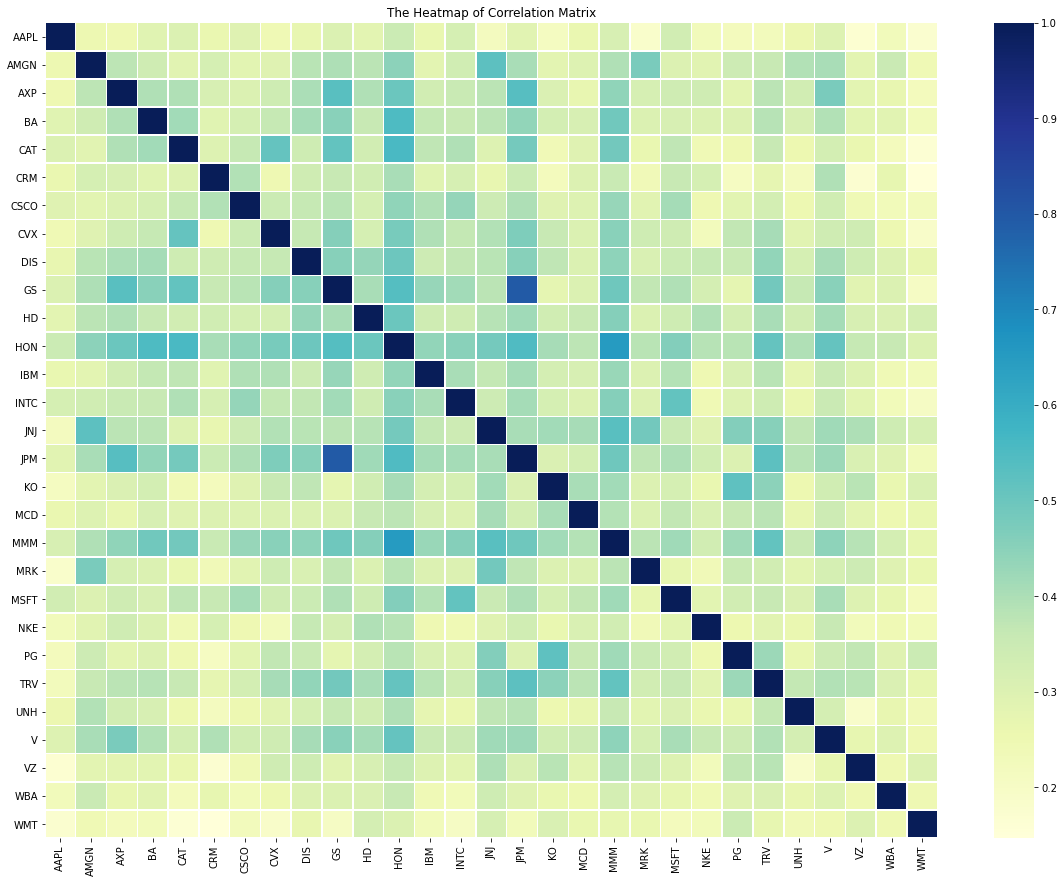

In [15]:
# Correlation matrix visualization
plt.subplots(figsize=(20,15))
sns.heatmap(correlation_matrix,
            cmap="YlGnBu", #"rocket"
            linewidths=.5,
            annot_kws={"size": 20},
            xticklabels=True, yticklabels=True)
plt.title("The Heatmap of Correlation Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
#plt.savefig('/Users/apple/Desktop/Second Version/Figure/covariance.png')
plt.show()

### Visualization of The Trend of Each Stock 

In [16]:
price_2=price_1.copy()

In [17]:
price_2=price_2.reset_index().rename(columns={'index':'Time'})
price_2

,Time,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
0,2012-01-03,12.629209,50.900780,41.973820,60.731094,71.366081,25.299999,13.938757,74.992943,34.300621,...,26.851942,21.749044,21.651094,49.722237,46.989967,44.366604,24.080502,25.648050,25.911947,48.266403
1,2012-01-04,12.697079,50.622887,41.999939,60.821095,72.026733,24.370001,14.208104,74.863831,34.784103,...,26.879980,22.260885,21.966444,49.699913,46.798809,45.012848,23.650280,25.312347,25.731672,47.770382
2,2012-01-05,12.838044,51.138962,42.487499,60.166485,72.535507,24.692499,14.155733,74.130028,35.366081,...,27.160418,22.488358,21.953026,49.491585,47.260815,45.314415,23.827976,25.138060,25.645460,47.538368
3,2012-01-06,12.972249,51.416855,42.026047,60.534698,72.717751,25.264999,14.103362,73.593224,35.733170,...,26.971123,22.837715,21.915005,49.372551,47.276733,45.478138,23.547411,25.066118,25.927622,47.202354
4,2012-01-09,12.951672,50.972233,42.130535,60.984760,73.735306,25.187500,14.193146,74.395012,35.589909,...,26.915039,22.537107,21.995516,49.580853,47.547569,45.426437,23.358013,25.092274,26.256807,47.346355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,2017-12-22,41.969559,159.535904,93.379768,281.228210,141.646500,102.629997,34.404850,106.607620,105.682114,...,48.387638,81.585175,61.094822,82.911049,123.544693,208.499496,110.218460,45.182446,64.744362,91.739983
1505,2017-12-26,40.904797,159.237503,93.218979,281.475922,142.274017,102.540001,34.342373,107.460632,105.147240,...,48.370468,81.480217,61.442352,83.226028,123.903236,208.120407,110.511879,45.207939,65.269730,92.627419
1506,2017-12-27,40.911991,159.346008,93.748596,281.723694,143.256241,102.650002,34.413773,107.093857,104.680435,...,48.370468,81.775978,60.766632,82.884056,123.894051,208.897537,111.519279,45.258907,64.877930,92.720818
1507,2017-12-28,41.027103,158.477875,94.287659,282.419434,144.074753,102.790001,34.440544,107.119431,104.806862,...,48.593693,81.785538,60.766632,82.857048,124.712212,211.124710,111.842049,45.386318,64.949150,92.851616


In [18]:
price_2_return=price_1_return.copy()
price_2_return=price_2_return.reset_index().rename(columns={'index':'Time'})
#price_2_return

#### Price

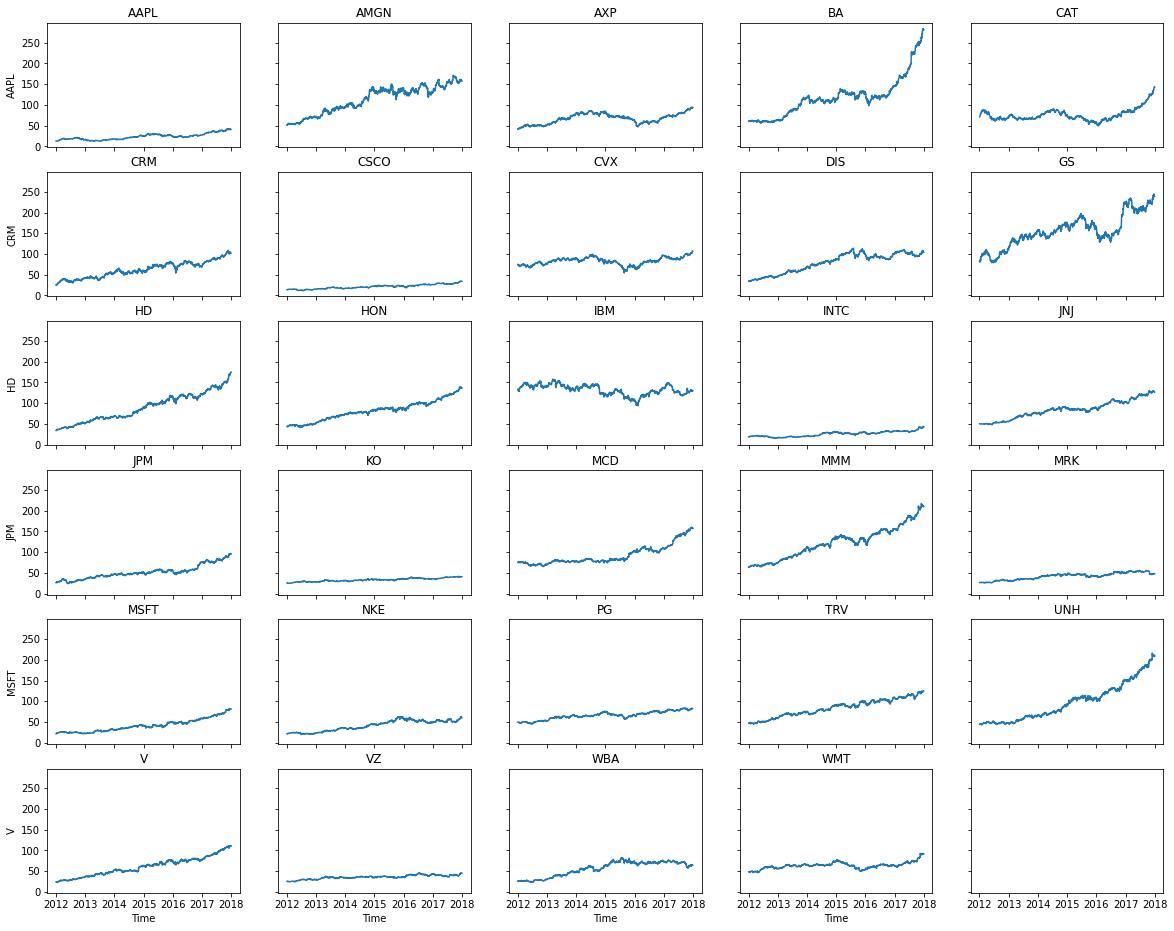

In [19]:
# Price visualization
fig, axes = plt.subplots(6, 5, figsize=(20, 16), sharex=True, sharey=True)
for i in range(0,5):
    sns.lineplot(ax=axes[0, i], data=price_2.iloc[:,:i+2], x='Time', y= price_2.columns[i+1]).set(title=price_2_return.columns[i+1])
    sns.lineplot(ax=axes[1, i], data=price_2.iloc[:,:i+7], x='Time', y= price_2.columns[i+6]).set(title=price_2_return.columns[i+6])
    sns.lineplot(ax=axes[2, i], data=price_2.iloc[:,:i+12], x='Time', y= price_2.columns[i+11]).set(title=price_2_return.columns[i+11])
    sns.lineplot(ax=axes[3, i], data=price_2.iloc[:,:i+17], x='Time', y= price_2.columns[i+16]).set(title=price_2_return.columns[i+16])
    sns.lineplot(ax=axes[4, i], data=price_2.iloc[:,:i+22], x='Time', y= price_2.columns[i+21]).set(title=price_2_return.columns[i+21])
for j in range(0,4):  
    sns.lineplot(ax=axes[5, j], data=price_2.iloc[:,:j+27], x='Time', y= price_2.columns[j+26]).set(title=price_2_return.columns[j+26])
#fig.savefig('/Users/apple/Desktop/Second Version/Figure/indiv_price.png')

#### Daily Return 

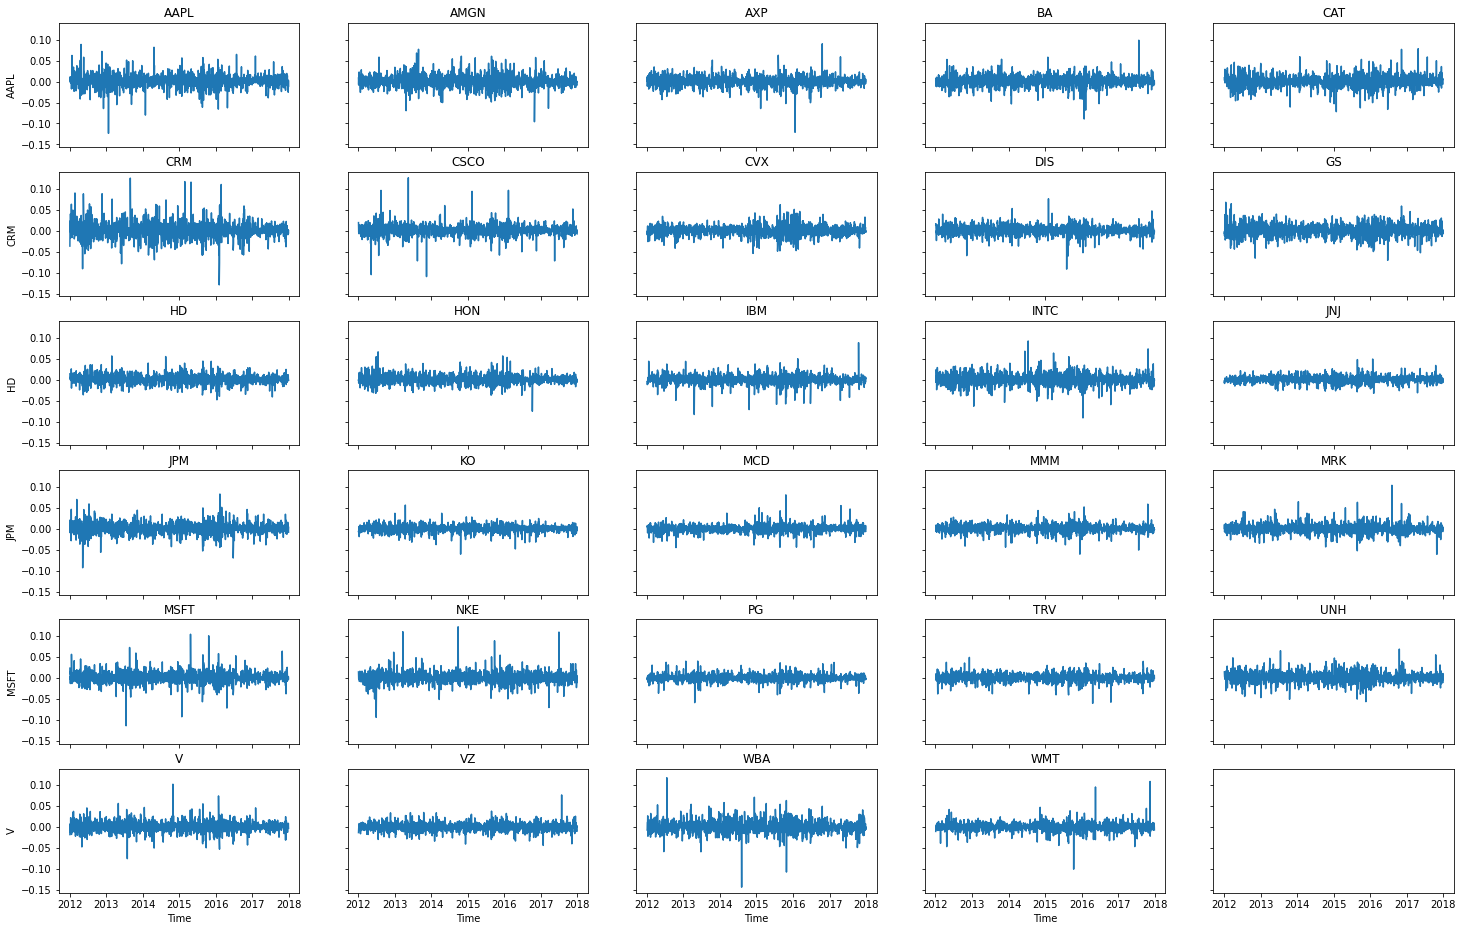

In [20]:
# Daily return 
fig, axes = plt.subplots(6, 5, figsize=(25, 16), sharex=True, sharey=True)
for i in range(0,5):
    sns.lineplot(ax=axes[0, i], data=price_2_return.iloc[:,:i+2], x='Time', y= price_2_return.columns[i+1]).set(title=price_2_return.columns[i+1])
    sns.lineplot(ax=axes[1, i], data=price_2_return.iloc[:,:i+7], x='Time', y= price_2_return.columns[i+6]).set(title=price_2_return.columns[i+6])
    sns.lineplot(ax=axes[2, i], data=price_2_return.iloc[:,:i+12], x='Time', y= price_2_return.columns[i+11]).set(title=price_2_return.columns[i+11])
    sns.lineplot(ax=axes[3, i], data=price_2_return.iloc[:,:i+17], x='Time', y= price_2_return.columns[i+16]).set(title=price_2_return.columns[i+16])
    sns.lineplot(ax=axes[4, i], data=price_2_return.iloc[:,:i+22], x='Time', y= price_2_return.columns[i+21]).set(title=price_2_return.columns[i+21])
for j in range(0,4):  
    sns.lineplot(ax=axes[5, j], data=price_2_return.iloc[:,:j+27], x='Time', y= price_2_return.columns[j+26]).set(title=price_2_return.columns[j+26])
#fig.savefig('/Users/apple/Desktop/Second Version/Figure/indiv_return.png')

Visulazing the Dow 30 based on their market capitalization

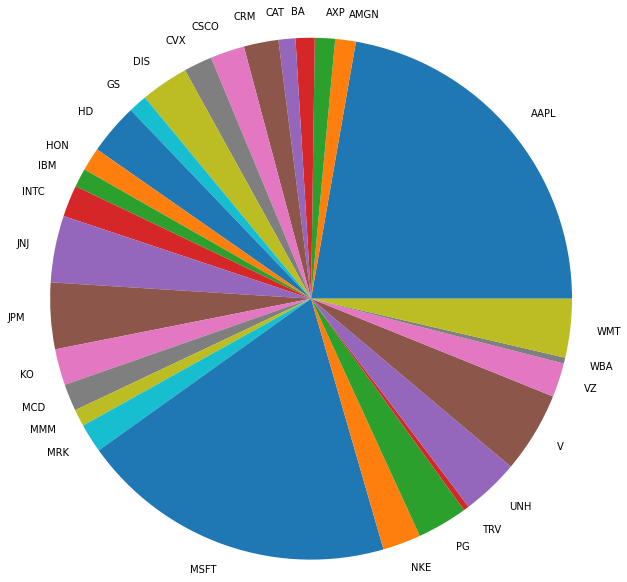

In [21]:
from pandas_datareader import data
tickers = dow
market_dow=data.get_quote_yahoo(tickers)['marketCap']
y = np.array(market_dow)
mylabels = dow

plt.pie(y, labels = mylabels,radius = 3,labeldistance = 1.1)
#plt.legend(bbox_to_anchor=(1.05, 1),loc="upper right")
#plt.savefig('/Users/apple/Desktop/Second Version/Figure/pie_chart.png',bbox_inches = 'tight')
plt.show() 

In [22]:
#pip install pandas_datareader

## Portfolio Selection

## 1. Minimum-Variance Model 

In [23]:
# Calculating the daily logrithm return of each stock 
price_return=price_1.pct_change().dropna()
Price_return=price_return.copy()
Price_return.head()
t_dow = price_return.columns
log_return = np.log(price_1/price_1.shift(1)).fillna(value=0)
log_return

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2012-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-01-04,0.005360,-0.005474,0.000622,0.001481,0.009215,-0.037451,0.019139,-0.001723,0.013997,-0.006523,...,0.001044,0.023261,0.014460,-0.000449,-0.004076,0.014461,-0.018027,-0.013175,-0.006982,-0.010330
2012-01-05,0.011041,0.010143,0.011542,-0.010821,0.007039,0.013147,-0.003693,-0.009850,0.016593,-0.001690,...,0.010379,0.010167,-0.000611,-0.004201,0.009824,0.006677,0.007485,-0.006909,-0.003356,-0.004869
2012-01-06,0.010399,0.005419,-0.010920,0.006101,0.002509,0.022920,-0.003706,-0.007268,0.010326,-0.012341,...,-0.006994,0.015416,-0.001733,-0.002408,0.000337,0.003607,-0.011844,-0.002866,0.010942,-0.007093
2012-01-09,-0.001588,-0.008685,0.002483,0.007407,0.013896,-0.003072,0.006346,0.010836,-0.004017,0.013503,...,-0.002082,-0.013250,0.003667,0.004210,0.005712,-0.001137,-0.008076,0.001043,0.012616,0.003046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,0.000000,-0.001473,0.002434,0.000237,0.007152,-0.009600,0.000519,0.001281,-0.008248,-0.007847,...,-0.004249,0.000117,-0.023115,0.005005,-0.000372,-0.007652,0.002488,0.003390,-0.007399,0.001528
2017-12-26,-0.025697,-0.001872,-0.001723,0.000880,0.004420,-0.000877,-0.001818,0.007970,-0.005074,-0.004839,...,-0.000355,-0.001287,0.005672,0.003792,0.002898,-0.001820,0.002659,0.000564,0.008082,0.009627
2017-12-27,0.000176,0.000681,0.005665,0.000880,0.006880,0.001072,0.002077,-0.003419,-0.004449,-0.006892,...,0.000000,0.003623,-0.011059,-0.004117,-0.000074,0.003727,0.009074,0.001127,-0.006021,0.001008
2017-12-28,0.002810,-0.005463,0.005734,0.002467,0.005697,0.001363,0.000778,0.000239,0.001207,0.002147,...,0.004604,0.000117,0.000000,-0.000326,0.006582,0.010605,0.002890,0.002811,0.001097,0.001410


### 1.1 Random Portfolio

Random portfolio is based on the Monte Carlo, this method generates a large amount of portfolio sets as well as the effeicient frontier. In this notebook, we set seed 1234 and run 100000 times for a higher accuracy results. 

In [24]:
# random seed 123, run times 100000
d_return = price_1.pct_change().dropna() # daily return function
ann_return = d_return.mean() * 250 # annual return function

d_cov = d_return.cov() # daily covariance matrix
ann_cov = d_cov* 250 # annual covariance matrix

P_expr = []
P_risk =[]
Shape = []
Weight = []


num = len(dow)
time = 100000

np.random.seed(1234)

for Random_port in range(time):
    W = np.random.random(num)
    W /= np.sum(W)
    re = np.dot(W, ann_return)
    volatility = np.sqrt(np.dot(W.T, np.dot(ann_cov, W)))
    sharpe = re / volatility
    Shape.append(sharpe)
    P_expr.append(re)
    P_risk.append(volatility)
    Weight.append(W)

portfolio = {'Return': P_expr,
             'Volatility': P_risk,
             'Sharpe Ratio': Shape}

for i,j in enumerate(dow):
    portfolio[j] = [weight[i] for weight in Weight]

data_port = pd.DataFrame(portfolio)

column = ['Return', 'Volatility', 'Sharpe Ratio'] + [stock for stock in dow]

data_port = data_port[column]

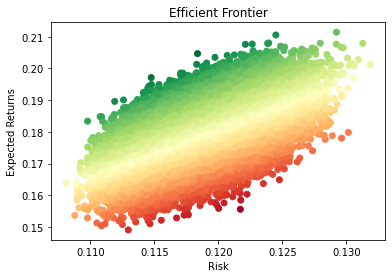

In [25]:
#plt.style.use('seaborn-dark')
plt.scatter(x=data_port['Volatility'], y=data_port['Return'], c=data_port['Sharpe Ratio'],cmap='RdYlGn')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
#plt.savefig('/Users/apple/Desktop/First Version/Figure/efficient_frontier.png')
plt.show()

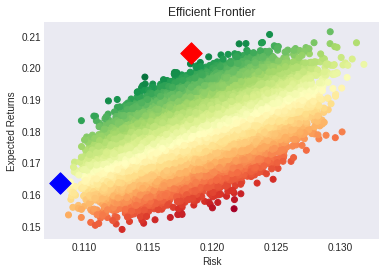

In [26]:
min_risk = data_port['Volatility'].min()
max_sharpe = data_port['Sharpe Ratio'].max()

maxsp_port = data_port.loc[data_port['Sharpe Ratio'] == max_sharpe]
MV_port = data_port.loc[data_port['Volatility'] == min_risk]

plt.style.use('seaborn-dark')
plt.scatter(x=data_port['Volatility'], y=data_port['Return'], c=data_port['Sharpe Ratio'],cmap='RdYlGn')
plt.scatter(x=maxsp_port['Volatility'], y=maxsp_port['Return'], c='red', marker='D',s = 230)
plt.scatter(x=MV_port['Volatility'], y=MV_port['Return'], c='blue', marker='D',s=230 )
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
#plt.savefig('/Users/apple/Desktop/First Version/Figure/efficient_frontier_point.png')
plt.show()

In [27]:
MV_port

,Return,Volatility,Sharpe Ratio,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
82182,0.163828,0.108075,1.515866,0.006496,0.038052,0.033987,0.00774,0.046335,0.006316,0.040354,...,0.028007,0.017289,0.001336,0.067797,0.06301,0.066094,0.016304,0.075118,0.028059,0.073457


In [28]:
sharp_ratio = data_port.iloc[82182, 2]
sharp_ratio

1.515866070952914

In [29]:
mv_weight=np.array(data_port.iloc[82182, 0:29])
mv_weight

array([1.63827574e-01, 1.08075230e-01, 1.51586607e+00, 6.49646863e-03,
       3.80516970e-02, 3.39868857e-02, 7.74036002e-03, 4.63348617e-02,
       6.31591753e-03, 4.03542683e-02, 2.19310386e-02, 9.15933272e-03,
       1.46305866e-02, 6.91031705e-02, 3.98205398e-03, 3.41259368e-02,
       5.45977905e-02, 5.89507681e-02, 3.85120962e-03, 2.74487636e-02,
       6.78542359e-02, 1.86143252e-02, 2.80065126e-02, 1.72891067e-02,
       1.33582846e-03, 6.77971776e-02, 6.30104606e-02, 6.60936455e-02,
       1.63038981e-02])

### Equal Weighted Portfolio

In [30]:
# Equal weighted Approach
num_stock = 29

# Equally assigning weights to each security
portfolio_weights_ew = np.repeat(1/num_stock, num_stock)

price_return_ew = price_return.copy()
# Calculating the return of portfolio
price_return_ew['Portfolio_EW'] = price_return_ew.mul(portfolio_weights_ew, axis=1)  \
                                           .sum(axis=1)
price_return_ew['Portfolio_EW']

2012-01-04    0.001415
2012-01-05    0.003440
2012-01-06   -0.000757
2012-01-09    0.001803
2012-01-10    0.008054
                ...   
2017-12-22   -0.001874
2017-12-26    0.000246
2017-12-27    0.000769
2017-12-28    0.001910
2017-12-29   -0.004725
Name: Portfolio_EW, Length: 1508, dtype: float64

In [31]:
portfolio_weights_ew

array([0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276])

In [32]:
# Sharpe Ratio
return_n = price_return.mul(portfolio_weights_ew, axis =1).sum(axis = 1).mean()
annual_re_ew = (1 + return_n)**252 - 1
cov_annual=price_return.cov()*252
volatility_ew = np.sqrt(np.dot(portfolio_weights_ew.T, 
                                       np.dot(cov_annual,portfolio_weights_ew)))
s_ew = annual_re_ew/volatility_ew
s_ew

1.6858427792855142

In [33]:
# volatility
volatility_ew

0.1176019109178813

In [34]:
annual_re_ew

0.19825833235108847

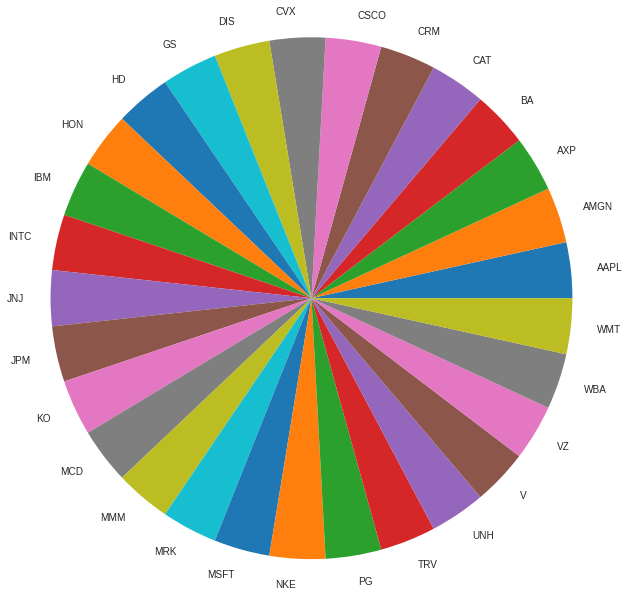

In [35]:
# Visualization
tickers = dow
y = portfolio_weights_ew
mylabels = dow
plt.pie(y, labels = mylabels,radius = 3,labeldistance = 1.1)
#plt.savefig('/Users/apple/Desktop/Second Version/Figure/pie_chart_ew.png',bbox_inches = 'tight')
plt.show()

In [36]:
# Factor Selection

In [37]:
#!pip install dcor
#import dcor

## 2. Critical Line Algorithm

Using package (PyPortfolioOpt) to generate CLA model

In [38]:
#pip install PyPortfolioOpt
#https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html

In [39]:
#pip install PyPortfolioOpt

In [40]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(price_1) #expected returns for each asset
S = CovarianceShrinkage(price_1).ledoit_wolf()#estimated covariance matrix

In [41]:
S

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
AAPL,0.061642,0.014741,0.011970,0.014746,0.017277,0.020024,0.015683,0.011874,0.011989,0.017162,...,0.008362,0.018060,0.012261,0.007489,0.008454,0.012718,0.014834,0.006586,0.013244,0.007247
AMGN,0.014741,0.055912,0.017172,0.016220,0.015640,0.023358,0.014445,0.013524,0.016223,0.021437,...,0.020458,0.015660,0.014805,0.011189,0.012766,0.018523,0.019166,0.010450,0.019598,0.009716
AXP,0.011970,0.017172,0.038150,0.015701,0.017578,0.018895,0.012775,0.012969,0.014069,0.023551,...,0.011341,0.014497,0.014295,0.007471,0.011183,0.012864,0.018527,0.008586,0.012368,0.007267
BA,0.014746,0.016220,0.015701,0.042166,0.019502,0.018337,0.014235,0.014444,0.015196,0.021019,...,0.011377,0.014217,0.013618,0.008435,0.011987,0.012852,0.016121,0.009138,0.013894,0.007881
CAT,0.017277,0.015640,0.017578,0.019502,0.052962,0.021035,0.017866,0.022916,0.014116,0.026973,...,0.011176,0.018766,0.012017,0.007825,0.012515,0.011666,0.015115,0.009437,0.011940,0.006432
CRM,0.020024,0.023358,0.018895,0.018337,0.021035,0.095560,0.026035,0.014961,0.018887,0.025220,...,0.013196,0.024353,0.021548,0.008763,0.012881,0.013487,0.024594,0.008298,0.019727,0.007635
CSCO,0.015683,0.014445,0.012775,0.014235,0.017866,0.026035,0.046955,0.014664,0.014108,0.018823,...,0.011355,0.019573,0.011718,0.008420,0.010783,0.010934,0.014542,0.008201,0.011809,0.008231
CVX,0.011874,0.013524,0.012969,0.014444,0.022916,0.014961,0.014664,0.038489,0.012735,0.020323,...,0.012161,0.014521,0.009515,0.009893,0.012063,0.011318,0.013345,0.010363,0.011578,0.006352
DIS,0.011989,0.016223,0.014069,0.015196,0.014116,0.018887,0.014108,0.012735,0.033199,0.018746,...,0.010348,0.013851,0.014320,0.008849,0.012018,0.011713,0.014896,0.009742,0.012954,0.008173
GS,0.017162,0.021437,0.023551,0.021019,0.026973,0.025220,0.018823,0.020323,0.018746,0.052376,...,0.015389,0.019752,0.016178,0.008760,0.016874,0.016477,0.020679,0.010389,0.016458,0.007837


In [42]:
r=price_1_return.mean()
#mu, covariance_matrix

In [43]:
#!pip install cvxopt
#!pip install mkl
#!pip install scs
#!pip install ecos
#!pip install osqp

In [44]:
#Price_return 
corr_cla = price_return.cov()
r=price_1_return.mean()
#mu, covariance_matrix
#min_volatility

OrderedDict([('AAPL', 0.002206972502324958), ('AMGN', 0.0), ('AXP', 0.0), ('BA', 0.14455798583169685), ('CAT', 0.0), ('CRM', 0.0), ('CSCO', 0.0), ('CVX', 0.0), ('DIS', 0.0), ('GS', 0.0), ('HD', 0.3548802413447438), ('HON', 0.0), ('IBM', 0.0), ('INTC', 0.0), ('JNJ', 0.04881276372275016), ('JPM', 0.0), ('KO', 0.0), ('MCD', 0.0), ('MMM', 0.09080322535548949), ('MRK', 0.0), ('MSFT', 0.02624765122597704), ('NKE', 0.0), ('PG', 0.0), ('TRV', 0.0), ('UNH', 0.20738061635982122), ('V', 0.12511054365719654), ('VZ', 0.0), ('WBA', 0.0), ('WMT', 0.0)])
Expected annual return: 28.6%
Annual volatility: 13.2%
Sharpe Ratio: 2.02


<AxesSubplot:xlabel='Volatility', ylabel='Return'>

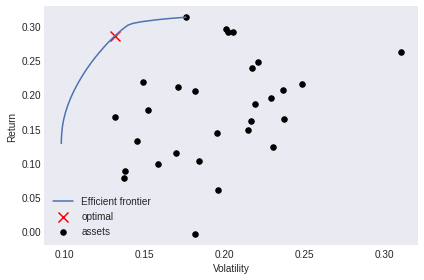

In [45]:
# Max Sharpe Ratio 
from pypfopt import CLA
from pypfopt import plotting
cla = CLA(mu, covariance_matrix)
print(cla.max_sharpe())
cla.portfolio_performance(verbose=True)
plotting.plot_efficient_frontier(cla)  # to plot

OrderedDict([('AAPL', 0.023888727259536037), ('AMGN', 0.0), ('AXP', 0.01928091095530032), ('BA', 0.0), ('CAT', 0.0), ('CRM', 0.0), ('CSCO', 0.0), ('CVX', 0.0), ('DIS', 2.639306955390132e-05), ('GS', 0.0), ('HD', 0.011576181007040522), ('HON', 0.0), ('IBM', 0.04076590518758375), ('INTC', 0.0), ('JNJ', 0.15628703869638277), ('JPM', 0.0), ('KO', 0.14035540229564203), ('MCD', 0.14898554039022321), ('MMM', 0.02569296204992116), ('MRK', 0.011041077370456497), ('MSFT', 0.0), ('NKE', 0.014402372393095402), ('PG', 0.12742253657273472), ('TRV', 0.039038742847380854), ('UNH', 0.036594372586870205), ('V', 0.0), ('VZ', 0.09974799194210371), ('WBA', 0.0), ('WMT', 0.10489384537617512)])
Expected annual return: 12.9%
Annual volatility: 9.8%
Sharpe Ratio: 1.10


<AxesSubplot:xlabel='Volatility', ylabel='Return'>

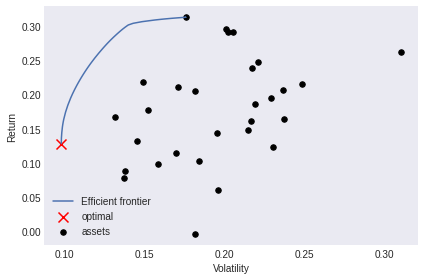

In [46]:
# Minimun Variance Portfolio
from pypfopt import CLA
from pypfopt import plotting
cla = CLA(mu, covariance_matrix)
print(cla.min_volatility())
cla.portfolio_performance(verbose=True)
plotting.plot_efficient_frontier(cla)  # to plot

In [47]:
#pip install portfoliolab

##  3. Hierarchical Risk Parity 

This method was created by López de Prado

In [48]:
#pip install pyhrp

In [49]:
from pypfopt.hierarchical_portfolio import HRPOpt

Expected annual return: 16.4%
Annual volatility: 10.8%
Sharpe Ratio: 1.34
(0.16413443979059822, 0.10752709145243237, 1.3404476754991568)


<AxesSubplot:>

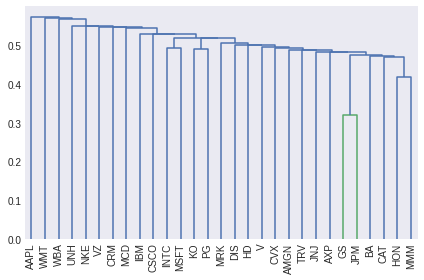

In [50]:
#from pypfopt.hierarchical_risk_parity import HRPOpt
hrp = HRPOpt(price_return) 
w = hrp.optimize()
HRP_r = hrp.portfolio_performance(verbose=True)
print(HRP_r)
# calculates the expected return, volatility and Sharpe ratio for the optimized portfolio
plotting.plot_dendrogram(hrp)

In [51]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch

In [52]:
import matplotlib
matplotlib.__version__

'3.3.4'

#### Step 1. Tree Clustering

In [53]:
# pct return is price_return
# correlation matrix
corr_hrp = price_return.corr()
# distance matrix
dis_corr = dist = ((1 - corr_hrp) / 2.)**.5 

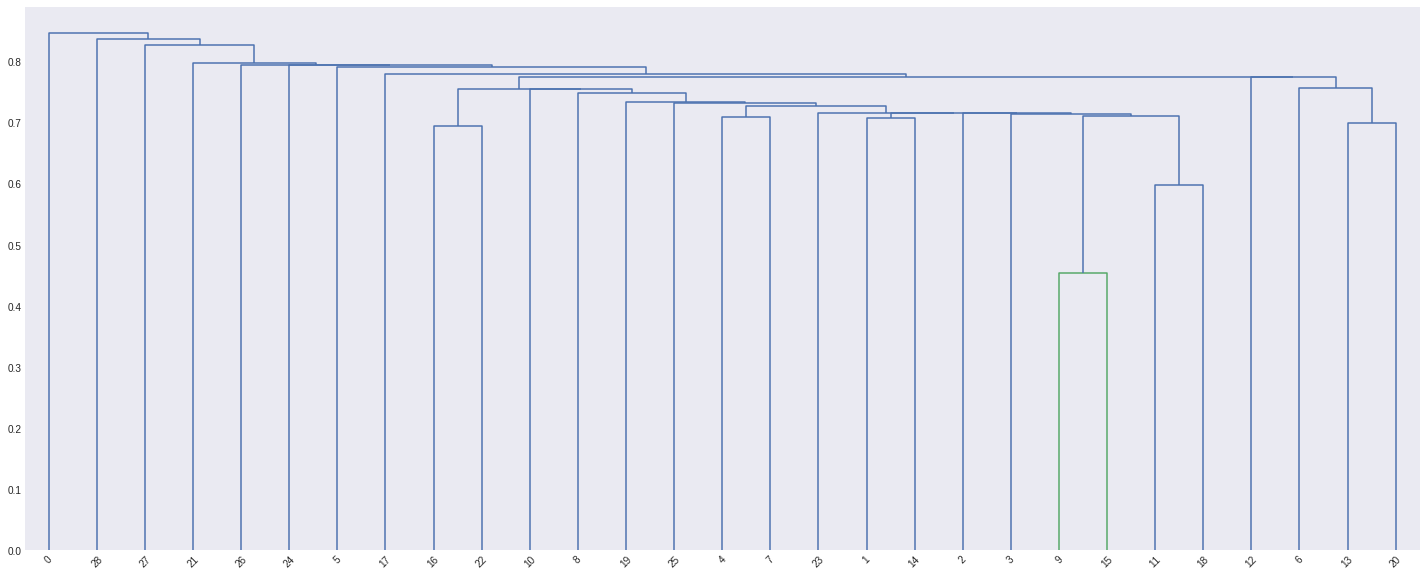

In [54]:
link = sch.linkage(dis_corr, 'single')
Tree = pd.DataFrame(link)

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Tree)
# plt.show()

In [55]:
Tree

,0,1,2,3
0,9.0,15.0,0.453657,2.0
1,11.0,18.0,0.598385,2.0
2,16.0,22.0,0.695244,2.0
3,13.0,20.0,0.699257,2.0
4,1.0,14.0,0.707902,2.0
5,4.0,7.0,0.709453,2.0
6,29.0,30.0,0.710729,4.0
7,3.0,35.0,0.714228,5.0
8,2.0,36.0,0.716131,6.0
9,33.0,37.0,0.716137,8.0


#### Step 2. Quasi-diagonalization

In [56]:
def get_quasi_diag(link):
    # sort clustered items by distance
    link = link.astype(int)
    # get the first and the second item of the last tuple
    sort_ix = pd.Series([link[-1,0], link[-1,1]]) 
    # the total num of items is the third item of the last list
    num_items = link[-1, 3]
    # if the max of sort_ix is bigger than or equal to the max_items
    while sort_ix.max() >= num_items:
        # assign sort_ix index with 24 x 24
        sort_ix.index = range(0, sort_ix.shape[0]*2, 2) # odd numers as index
        
        df0 = sort_ix[sort_ix >= num_items] # find clusters
        
        # df0 contain even index and cluster index
        i = df0.index
        j = df0.values - num_items # 
        
        sort_ix[i] = link[j,0] # item 1
        
        df0  = pd.Series(link[j, 1], index=i+1)
        
        sort_ix = sort_ix.append(df0)
        sort_ix = sort_ix.sort_index()
        
        sort_ix.index = range(sort_ix.shape[0])
        
    
    return sort_ix.tolist()

In [57]:
sort_ix = get_quasi_diag(link)
sort_ix

[0,
 28,
 27,
 21,
 26,
 24,
 5,
 17,
 16,
 22,
 10,
 8,
 19,
 25,
 4,
 7,
 23,
 1,
 14,
 2,
 3,
 9,
 15,
 11,
 18,
 12,
 6,
 13,
 20]

#### Step 3. Recursive Bisection

In [58]:
def get_cluster_var(cov, c_items):
    cov_ = cov.iloc[c_items, c_items] # matrix slice
    # calculate the inversev-variance portfolio
    ivp = 1./np.diag(cov_)
    ivp/=ivp.sum()
    w_ = ivp.reshape(-1,1)
    c_var = np.dot(np.dot(w_.T, cov_), w_)[0,0]
    return c_var
def get_rec_bipart(cov, sort_ix):
    # compute HRP allocation
    # intialize weights of 1
    w = pd.Series(1, index=sort_ix)
    
    # intialize all items in one cluster
    c_items = [sort_ix]
    while len(c_items) > 0:
        # bisection

        c_items = [i[int(j):int(k)] for i in c_items for j,k in 
                   ((0,len(i)/2),(len(i)/2,len(i))) if len(i)>1]
        
        # now it has 2
        for i in range(0, len(c_items), 2):
            
            c_items0 = c_items[i] # cluster 1
            c_items1 = c_items[i+1] # cluter 2
            
            c_var0 = get_cluster_var(cov, c_items0)
            c_var1 = get_cluster_var(cov, c_items1)
            
            alpha = 1 - c_var0/(c_var0+c_var1)
            
            w[c_items0] *= alpha
            w[c_items1] *=1-alpha
    return w

In [59]:
weights_hrp = get_rec_bipart(corr_hrp, sort_ix)
weights_hrp

0     0.058423
28    0.046810
27    0.046810
21    0.042674
26    0.042674
24    0.043033
5     0.043033
17    0.048833
16    0.032122
22    0.032122
10    0.032038
8     0.032038
19    0.034740
25    0.034740
4     0.044102
7     0.031342
23    0.031342
1     0.028745
14    0.028745
2     0.031378
3     0.031378
9     0.021961
15    0.021961
11    0.023874
18    0.023874
12    0.028945
6     0.028945
13    0.026659
20    0.026659
dtype: float64

In [60]:
new_index = [corr_hrp.columns[i] for i in weights_hrp.index]
weights_hrp.index = new_index

In [61]:
weights_hrp=weights_hrp.sort_index(ascending=True)
weights_hrp

AAPL    0.058423
AMGN    0.028745
AXP     0.031378
BA      0.031378
CAT     0.044102
CRM     0.043033
CSCO    0.028945
CVX     0.031342
DIS     0.032038
GS      0.021961
HD      0.032038
HON     0.023874
IBM     0.028945
INTC    0.026659
JNJ     0.028745
JPM     0.021961
KO      0.032122
MCD     0.048833
MMM     0.023874
MRK     0.034740
MSFT    0.026659
NKE     0.042674
PG      0.032122
TRV     0.031342
UNH     0.043033
V       0.034740
VZ      0.042674
WBA     0.046810
WMT     0.046810
dtype: float64

In [62]:
# Chekcing with the original index
Index_1=price_return.T.index
#Index_1

In [63]:
return_n = price_return.mul(weights_hrp, axis =1).sum(axis = 1).mean()
annual_re_hrp = (1 + return_n)**252 - 1
cov_annual=price_return.cov()*252
random_volatility_hrp = np.sqrt(np.dot(weights_hrp.T, 
                                       np.dot(cov_annual,weights_hrp)))

In [64]:
s_hrp = annual_re_hrp/random_volatility_hrp
s_hrp

1.7043817858565034

In [65]:
random_volatility_hrp

0.11613459375662172

In [66]:
annual_re_hrp

0.19793768630663044

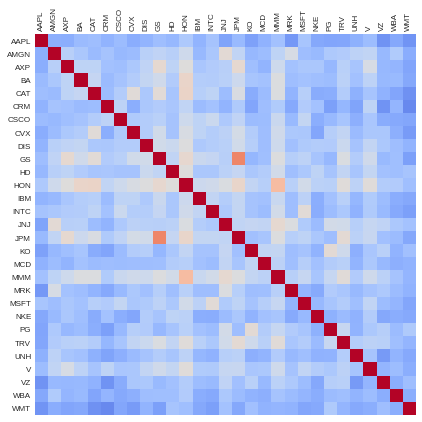

In [67]:
#find correlation matrix, i.e. the "distances" between each stock
import matplotlib.cm as cm
corr_hrp = price_return.corr()
size = 7
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr_hrp,cmap=cm.get_cmap('coolwarm'), vmin=0,vmax=1)
plt.xticks(range(len(corr_hrp.columns)), corr_hrp.columns, rotation='vertical', fontsize=8);
plt.yticks(range(len(corr_hrp.columns)), corr_hrp.columns, fontsize=8);

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage
zz = linkage(corr_hrp, 'average')
zz[0]

array([ 9.        , 15.        ,  0.30421182,  2.        ])

In [69]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import pylab
c, coph_dists = cophenet(zz, pdist(corr_hrp))
c

0.8182537966184357

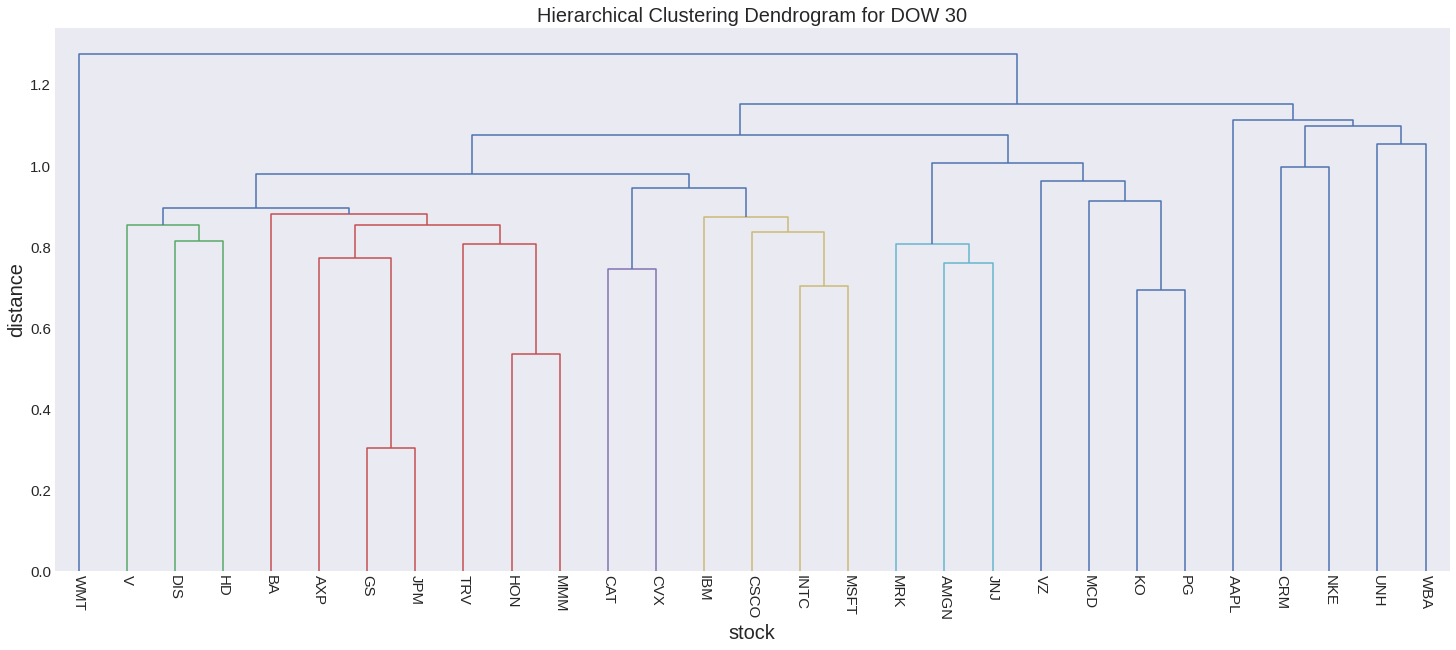

In [70]:
plt.figure(figsize=(25, 10))
labelsize=20
ticksize=15
plt.title('Hierarchical Clustering Dendrogram for '+"DOW 30", fontsize=labelsize)
plt.xlabel('stock', fontsize=labelsize)
plt.ylabel('distance', fontsize=labelsize)
dendrogram(
    zz,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = corr_hrp.columns
)
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)
#plt.savefig('dendogram_'+'DOW 30'+'.png')
plt.show()

In [71]:
# the most correlated stock are GS and JPM
from scipy.spatial.distance import squareform

In [72]:
def seriation(Z, N, cur_index):
    """Returns the order implied by a hierarchical tree (dendrogram).
    
       :param Z: A hierarchical tree (dendrogram).
       :param N: The number of points given to the clustering process.
       :param cur_index: The position in the tree for the recursive traversal.
       
       :return: The order implied by the hierarchical tree Z.
    """
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index - N, 0])
        right = int(Z[cur_index - N, 1])
        return (seriation(Z, N, left) + seriation(Z, N, right))

    
def compute_serial_matrix(dist_mat, method="ward"):
    """Returns a sorted distance matrix.
    
       :param dist_mat: A distance matrix.
       :param method: A string in ["ward", "single", "average", "complete"].
        
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    """
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method)
    res_order = seriation(res_linkage, N, N + N - 2)
    seriated_dist = np.zeros((N, N))
    a,b = np.triu_indices(N, k=1)
    seriated_dist[a,b] = dist_mat[[res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

In [73]:
ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dis_corr.values, method='single')

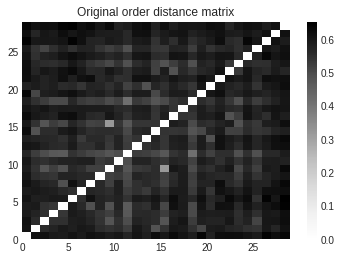

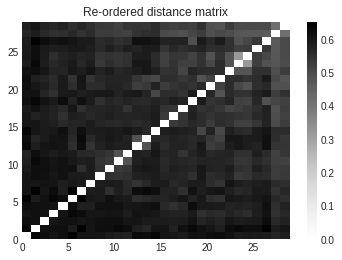

In [74]:
plt.pcolormesh(dis_corr)
plt.colorbar()
plt.title('Original order distance matrix')
plt.show()

plt.pcolormesh(ordered_dist_mat)
plt.colorbar()
plt.title('Re-ordered distance matrix')
plt.show()

### Equal Risk Contribution

In [75]:
#pip install pyrb

In [76]:
#pip install pyhrp

In [77]:
#pip install git+https://github.com/jcrichard/pyrb

In [78]:
from pyrb import EqualRiskContribution, RiskBudgeting, RiskBudgetAllocation
ERC = EqualRiskContribution(covariance_matrix)
ERC.solve()
ERC.get_risk_contributions()
ERC.get_volatility()
#
optimal_weights =  ERC.x
risk_contributions =  ERC.get_risk_contributions(scale = False)
risk_contributions_scaled =  ERC.get_risk_contributions()
allocation = pd.DataFrame(np.concatenate([[optimal_weights,risk_contributions,risk_contributions_scaled]]).T, index = covariance_matrix.index,columns=["optinal weigths","risk contribution","risk contribution(scaled)"])
#allocation
weight_er = allocation["optinal weigths"]
weight_er
#
return_n = price_return.mul(weight_er, axis =1).sum(axis = 1).mean()
annual_re = (1 + return_n)**252 - 1
cov_annual=price_return.cov()*252
random_volatility_er = np.sqrt(np.dot(weight_er.T, 
                                       np.dot(cov_annual,weight_er)))
s_er = annual_re/random_volatility_er
s_er

1.6761528278812203

In [79]:
random_volatility_er

0.11252843069458178

## Result Conclusion

Text(0.5, 1.0, 'Sharpe Ratio of Different Strategies')

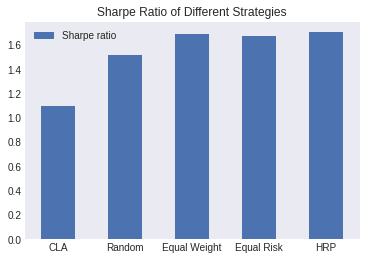

In [80]:
in_sample = {'CLA':[1.10],'Random':[sharp_ratio],'Equal Weight':[s_ew],
            'Equal Risk':[s_er],'HRP':[s_hrp]}
in_sample=pd.DataFrame(data=in_sample).T
in_sample.columns = ['Sharpe ratio']
in_sample.plot.bar(rot=0)
plt.title('Sharpe Ratio of Different Strategies')

In [81]:
in_sample

,Sharpe ratio
CLA,1.100000
Random,1.515866
Equal Weight,1.685843
Equal Risk,1.676153
HRP,1.704382


## Visualization

In [82]:
# Weight
Weight = pd.DataFrame()

In [83]:
cla = CLA(mu, covariance_matrix)
w_cla=list(cla.max_sharpe().items())
w_cla = pd.DataFrame(w_cla)
w_cla =w_cla.set_index([0])

In [84]:
Weight['Weight_HRP']=weights_hrp
Weight['Weight_CLA']=w_cla
Weight['Weight_ERC']=weight_er
Weight['Weight_EW']=portfolio_weights_ew
Weight

,Weight_HRP,Weight_CLA,Weight_ERC,Weight_EW
AAPL,0.058423,0.002207,0.032229,0.034483
AMGN,0.028745,0.000000,0.026817,0.034483
AXP,0.031378,0.000000,0.031832,0.034483
BA,0.031378,0.144558,0.030371,0.034483
CAT,0.044102,0.000000,0.028126,0.034483
CRM,0.043033,0.000000,0.023507,0.034483
CSCO,0.028945,0.000000,0.030574,0.034483
CVX,0.031342,0.000000,0.032389,0.034483
DIS,0.032038,0.000000,0.033055,0.034483
GS,0.021961,0.000000,0.024396,0.034483


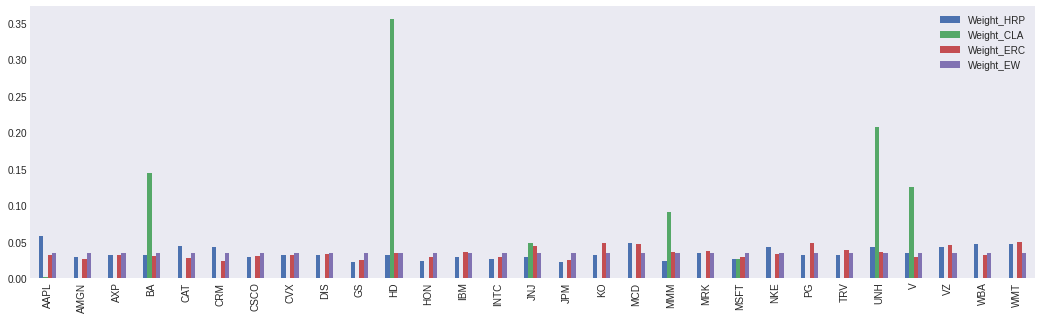

In [85]:
Weight.plot(kind = 'bar',figsize=(18,5))
plt.show()
# CLA concentrate to some assets

In [86]:
# Volatility 

Text(0.5, 1.0, 'Volatility of Different Strategies')

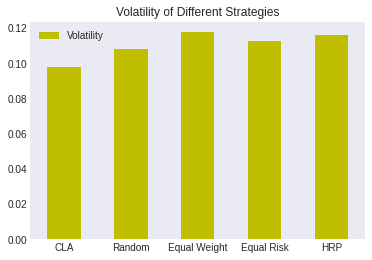

In [87]:
in_sample_v = {'CLA':[0.098],'Random':[0.108075],'Equal Weight':[volatility_ew],
            'Equal Risk':[random_volatility_er],'HRP':[random_volatility_hrp]}
in_sample_v = pd.DataFrame(in_sample_v).T
in_sample_v.columns = ['Volatility']
in_sample_v.plot.bar(rot=0,color = 'y')
plt.title('Volatility of Different Strategies')

In [88]:
in_sample_v

,Volatility
CLA,0.098000
Random,0.108075
Equal Weight,0.117602
Equal Risk,0.112528
HRP,0.116135


# Out of Sample

In [89]:
dow_os = si.tickers_dow()
dow_os.remove("DOW")
dow_os

['AAPL',
 'AMGN',
 'AXP',
 'BA',
 'CAT',
 'CRM',
 'CSCO',
 'CVX',
 'DIS',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'TRV',
 'UNH',
 'V',
 'VZ',
 'WBA',
 'WMT']

In [90]:
# Forming data and save into csv
price_os = pd.DataFrame()
for i in range(len(dow_os)):
    t = str(dow_os[i])
    adj = si.get_data(t,start_date ="01-01-2018",end_date = "05-31-2021")
    adj_n=adj.drop(['open','high','low','close','volume','ticker'],axis=1)
    adj_f=adj_n.T
    price_os=price_os.append(adj_f)
    
price_os.index = dow_os
#start_date ="01-01-2018",end_date = "12-31-2020"
#price.to_csv('/Users/apple/Desktop/First Version/Data/dow_out_sample_dataset.csv',index = True, header=True)

In [91]:
price_os=price_os.T
price_os
#price_os.to_csv('/Users/apple/Desktop/First Version/Data/dow_out_sample_dataset_1.csv',index = True, header=True)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2018-01-02,41.310070,160.060394,93.568916,282.886383,142.819702,104.410004,34.681511,108.825432,108.726067,239.537415,...,48.267445,82.004974,61.287899,81.579140,121.329178,209.598862,111.998543,45.471256,66.738945,92.094955
2018-01-03,41.302879,163.080734,94.145805,283.801239,143.037964,105.290001,34.958183,109.618706,109.192856,237.307571,...,48.198757,82.386620,61.278240,81.480141,121.715317,211.797577,113.113533,44.536869,67.237610,92.898293
2018-01-04,41.494736,162.393478,95.711739,282.724396,145.002396,106.680000,35.057083,109.277519,109.144241,240.624222,...,48.980034,83.111740,61.239632,82.056091,121.715317,212.716873,113.534111,44.681274,63.755974,92.982368
2018-01-05,41.967163,163.361069,95.930016,294.322296,147.294189,108.099998,35.542610,109.098396,108.551003,239.396881,...,48.928520,84.142174,61.760906,82.110107,121.494652,216.773132,116.253151,44.579342,64.931328,93.533501
2018-01-08,41.811283,163.315872,95.047401,295.570740,150.995636,108.860001,35.911259,109.635796,106.994995,235.920990,...,48.645206,84.228027,62.311138,82.542084,120.841957,213.010635,116.722610,44.502892,65.759468,94.916016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,127.099998,247.750000,158.227142,237.440002,237.773987,226.990005,53.020344,105.599998,174.309998,367.050354,...,74.767632,250.779999,133.790039,137.097748,157.843338,409.450378,229.320007,56.347000,54.830002,141.759995
2021-05-25,126.900002,242.000000,157.598785,240.740005,235.904022,227.710007,52.940899,103.870003,176.169998,363.283081,...,73.320152,251.720001,134.049515,137.564804,155.675522,411.542694,229.020004,55.852554,54.189999,142.339996
2021-05-26,126.849998,238.550003,158.167297,241.369995,236.441147,229.679993,52.543667,104.120003,176.470001,366.163361,...,73.064713,251.490005,136.614334,137.256744,156.262222,411.702118,227.070007,55.733887,52.009998,142.169998
2021-05-27,125.279999,235.309998,159.324295,250.699997,239.992081,225.830002,52.553596,103.010002,179.039993,370.119995,...,71.825371,249.309998,136.285004,134.136368,158.459885,411.194000,226.860001,55.664665,53.040001,141.690002


In [92]:
price_os_return=price_os.pct_change().dropna()
price_os_return
#price_os_return.to_csv('/Users/apple/Desktop/First Version/Data/price_os_return.csv',index = True, header=True)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2018-01-03,-0.000174,0.018870,0.006165,0.003234,0.001528,0.008428,0.007978,0.007289,0.004293,-0.009309,...,-0.001423,0.004654,-0.000158,-0.001214,0.003183,0.010490,0.009955,-0.020549,0.007472,0.008723
2018-01-04,0.004645,-0.004214,0.016633,-0.003794,0.013734,0.013202,0.002829,-0.003112,-0.000445,0.013976,...,0.016209,0.008801,-0.000630,0.007069,0.000000,0.004340,0.003718,0.003242,-0.051781,0.000905
2018-01-05,0.011385,0.005958,0.002281,0.041022,0.015805,0.013311,0.013850,-0.001639,-0.005435,-0.005101,...,-0.001052,0.012398,0.008512,0.000658,-0.001813,0.019069,0.023949,-0.002281,0.018435,0.005927
2018-01-08,-0.003714,-0.000277,-0.009201,0.004242,0.025130,0.007031,0.010372,0.004926,-0.014334,-0.014519,...,-0.005790,0.001020,0.008909,0.005261,-0.005372,-0.017357,0.004038,-0.001715,0.012754,0.014781
2018-01-09,-0.000115,0.015393,0.003694,0.026697,0.002409,0.002664,-0.006260,-0.005369,-0.000727,0.008459,...,0.002471,-0.000679,-0.007126,-0.007305,0.007760,0.004983,-0.001927,-0.003668,-0.005823,-0.012007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,0.013314,-0.012988,0.011283,0.011157,0.007629,0.019813,0.018310,0.014214,0.011079,0.005542,...,-0.001894,0.022882,0.010553,-0.000290,-0.002200,-0.001652,0.011245,0.001230,-0.000911,0.000071
2021-05-25,-0.001574,-0.023209,-0.003971,0.013898,-0.007864,0.003172,-0.001498,-0.016383,0.010671,-0.010264,...,-0.019360,0.003748,0.001939,0.003407,-0.013734,0.005110,-0.001308,-0.008775,-0.011673,0.004091
2021-05-26,-0.000394,-0.014256,0.003607,0.002617,0.002277,0.008651,-0.007503,0.002407,0.001703,0.007928,...,-0.003484,-0.000914,0.019133,-0.002239,0.003769,0.000387,-0.008515,-0.002125,-0.040229,-0.001194
2021-05-27,-0.012377,-0.013582,0.007315,0.038654,0.015018,-0.016762,0.000189,-0.010661,0.014563,0.010806,...,-0.016962,-0.008668,-0.002411,-0.022734,0.014064,-0.001234,-0.000925,-0.001242,0.019804,-0.003376


In [93]:
covariance_matrix_o = price_os_return.iloc[:,:].cov()*252
covariance_matrix_o

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
AAPL,0.118975,0.048472,0.062569,0.079922,0.054959,0.078030,0.065450,0.055095,0.050133,0.065506,...,0.034591,0.082791,0.055464,0.035466,0.043532,0.057162,0.066953,0.021268,0.041766,0.033368
AMGN,0.048472,0.078222,0.043265,0.039361,0.043875,0.045864,0.046782,0.041966,0.034289,0.042616,...,0.040710,0.051273,0.033681,0.033226,0.036404,0.049347,0.042841,0.024541,0.040837,0.030004
AXP,0.062569,0.043265,0.155753,0.145393,0.086754,0.061767,0.068590,0.110591,0.087724,0.108081,...,0.039543,0.065207,0.068546,0.036256,0.081406,0.072696,0.087467,0.031995,0.061123,0.024446
BA,0.079922,0.039361,0.145393,0.296609,0.102889,0.075986,0.074987,0.127829,0.095855,0.116783,...,0.040538,0.075371,0.083969,0.037045,0.091772,0.077940,0.092228,0.032185,0.069386,0.025889
CAT,0.054959,0.043875,0.086754,0.102889,0.119946,0.052531,0.062291,0.080908,0.061440,0.082053,...,0.034205,0.054096,0.057170,0.030492,0.056269,0.053909,0.062259,0.026849,0.057337,0.026254
CRM,0.078030,0.045864,0.061767,0.075986,0.052531,0.144963,0.061582,0.052094,0.049059,0.058966,...,0.035862,0.086312,0.055044,0.028814,0.044311,0.053487,0.072858,0.019077,0.030991,0.029353
CSCO,0.065450,0.046782,0.068590,0.074987,0.062291,0.061582,0.094255,0.060630,0.054965,0.063390,...,0.036745,0.066444,0.052221,0.035913,0.044566,0.051809,0.061616,0.027712,0.053215,0.031095
CVX,0.055095,0.041966,0.110591,0.127829,0.080908,0.052094,0.060630,0.145718,0.068827,0.091173,...,0.041448,0.058261,0.058630,0.030732,0.073165,0.068777,0.073399,0.029910,0.051651,0.022085
DIS,0.050133,0.034289,0.087724,0.095855,0.061440,0.049059,0.054965,0.068827,0.106837,0.071534,...,0.027381,0.052025,0.052756,0.029445,0.048688,0.046067,0.061857,0.023904,0.042376,0.022700
GS,0.065506,0.042616,0.108081,0.116783,0.082053,0.058966,0.063390,0.091173,0.071534,0.124505,...,0.036023,0.063040,0.061514,0.033153,0.070123,0.063503,0.068774,0.028290,0.056438,0.027351


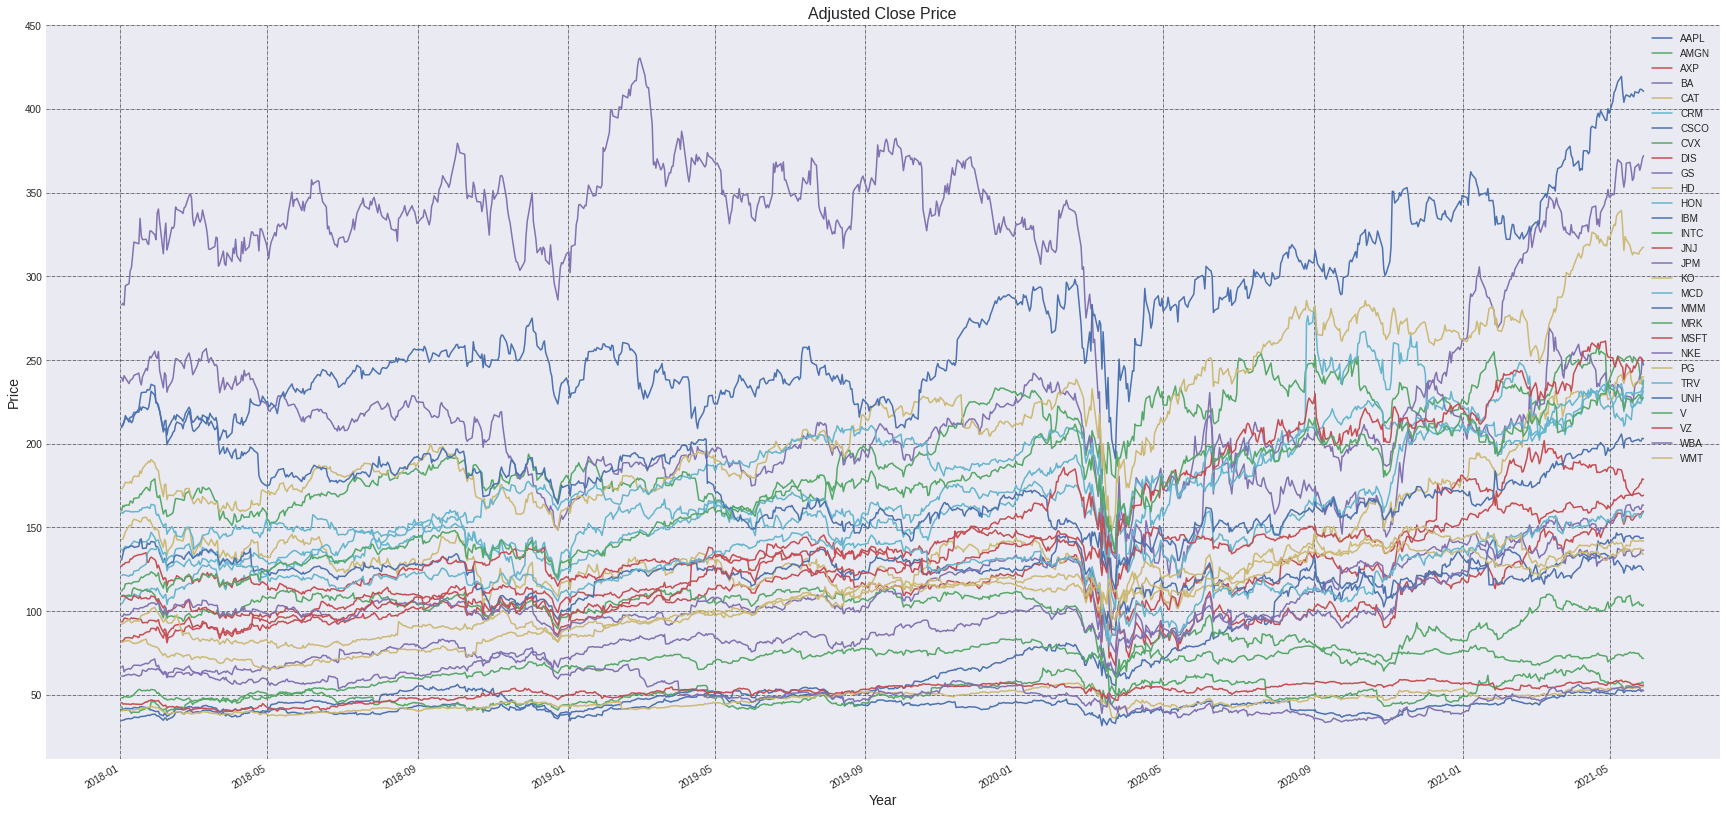

In [94]:
# Plot all the close prices
price_os.iloc[:,:30].plot(figsize=(30, 15))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
#plt.savefig('/Users/apple/Desktop/Second Version/Figure/out_adj_price.png')
plt.show()

### CLA Sharpe Ratio

In [95]:
#calculate the weight of cla result based on in-sample dataset
cla = CLA(mu, covariance_matrix)
#print(cla.cla.max_sharpe())
#cla.portfolio_performance(verbose=True)
#plotting.plot_efficient_frontier(cla) 

In [96]:
w_cla=list(cla.max_sharpe().items())
w_cla = pd.DataFrame(w_cla)
w_cla =w_cla.set_index([0])

In [97]:
# Using the out-of-sample price return and covariance matirx
return_n = np.dot(price_os_return,w_cla).sum(axis = 1).mean()
annual_re = (1 + return_n)**252 - 1
cov_annual=price_os_return.cov()*252
random_volatility_cla = np.sqrt(np.dot(w_cla.T, 
                                       np.dot(covariance_matrix_o,w_cla)))

In [98]:
sharpe_cla_o = annual_re/random_volatility_cla
sharpe_cla_o=sharpe_cla_o.item(0)
sharpe_cla_o

0.8161243528380533

In [99]:
w_cla_v=list(cla.min_volatility().items())
w_cla_v= pd.DataFrame(w_cla_v)
w_cla_v=w_cla_v.set_index([0])

In [100]:
return_n = np.dot(price_os_return,w_cla_v).sum(axis = 1).mean()
annual_re = (1 + return_n)**252 - 1
cov_annual=price_os_return.cov()*252
random_volatility_cla = np.sqrt(np.dot(w_cla_v.T, 
                                       np.dot(covariance_matrix_o,w_cla_v)))

In [101]:
sharpe_cla_v = annual_re/random_volatility_cla
sharpe_cla_v=sharpe_cla_v.item(0)
sharpe_cla_v

0.8204706148575961

### HRP Sharpe Ratio

In [102]:
return_n = price_os_return.mul(weights_hrp, axis =1).sum(axis = 1).mean()
annual_re = (1 + return_n)**252 - 1
cov_annual=price_return.cov()*252
random_volatility_HRP = np.sqrt(np.dot(weights_hrp.T, 
                                       np.dot(covariance_matrix_o,weights_hrp)))

In [103]:
s_hrp_o = annual_re/random_volatility_HRP
s_hrp_o

0.8945071269379088

### Equal Risk Parity

In [104]:
weight_er

AAPL    0.032229
AMGN    0.026817
AXP     0.031832
BA      0.030371
CAT     0.028126
CRM     0.023507
CSCO    0.030574
CVX     0.032389
DIS     0.033055
GS      0.024396
HD      0.034738
HON     0.029455
IBM     0.035623
INTC    0.029627
JNJ     0.043933
JPM     0.025361
KO      0.048347
MCD     0.046599
MMM     0.035515
MRK     0.037069
MSFT    0.028436
NKE     0.033726
PG      0.047772
TRV     0.038392
UNH     0.035773
V       0.029685
VZ      0.045693
WBA     0.031935
WMT     0.049025
Name: optinal weigths, dtype: float64

In [105]:
return_n = price_os_return.mul(weight_er, axis =1).sum(axis = 1).mean()
annual_re = (1 + return_n)**252 - 1
cov_annual=price_return.cov()*252
random_volatility_ER = np.sqrt(np.dot(weight_er.T, 
                                       np.dot(covariance_matrix_o,weight_er)))

In [106]:
s_ew_o = annual_re/random_volatility_ER
s_ew_o

0.845919463941432

In [107]:
### Equal Weight 

In [108]:
num_ew = 29
weights_ew = np.repeat(1/num_ew, num_ew)
return_n = price_os_return.mul(weights_ew, axis =1).sum(axis = 1).mean()
annual_re = (1 + return_n)**252 - 1
cov_annual=price_return.cov()*252
random_volatility_EW = np.sqrt(np.dot(weights_ew.T, 
                                       np.dot(covariance_matrix_o,weights_ew)))

In [109]:
s_ew_w = annual_re/random_volatility_EW
s_ew_w

0.8512691276302744

## Random 

In [110]:
return_n = price_os_return.mul(mv_weight, axis =1).sum(axis = 1).mean()
annual_re = (1 + return_n)**252 - 1
cov_annual=price_return.cov()*252
random_volatility_R = np.sqrt(np.dot(mv_weight.T, 
                                       np.dot(covariance_matrix_o,mv_weight)))

In [111]:
s_rdw_w = annual_re/random_volatility_R
s_rdw_w

0.9679399933326195

## out of sample plot

Text(0.5, 1.0, 'Sharpe Ratio of Different Strategies')

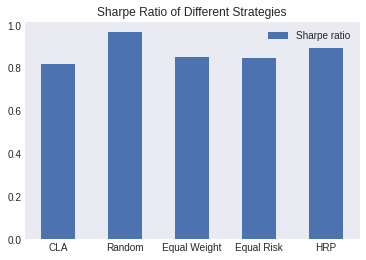

In [112]:
out_of_sample = {'CLA':[sharpe_cla_v],'Random':[s_rdw_w],'Equal Weight':[s_ew_w],
            'Equal Risk':[s_ew_o],'HRP':[s_hrp_o]}
out_of_sample=pd.DataFrame(data=out_of_sample).T
out_of_sample.columns = ['Sharpe ratio']
out_of_sample.plot.bar(rot=0)
plt.title('Sharpe Ratio of Different Strategies')

In [113]:
out_of_sample

,Sharpe ratio
CLA,0.820471
Random,0.967940
Equal Weight,0.851269
Equal Risk,0.845919
HRP,0.894507


### Volatility

Text(0.5, 1.0, 'Volatility of Different Strategies')

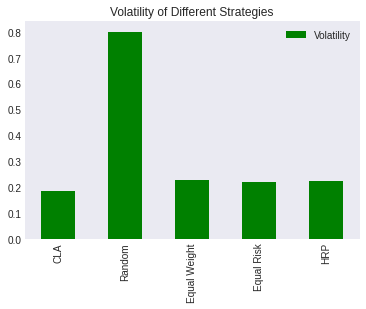

In [114]:
out_sample_v = {'CLA':[random_volatility_cla.item(0)],'Random':[random_volatility_R],'Equal Weight':[random_volatility_EW],
            'Equal Risk':[random_volatility_ER],'HRP':[random_volatility_HRP]}
out_sample_v = pd.DataFrame(out_sample_v).T
out_sample_v.columns = ['Volatility']
out_sample_v.plot.bar(color = 'g')
plt.title('Volatility of Different Strategies')

In [115]:
out_sample_v

,Volatility
CLA,0.185667
Random,0.800685
Equal Weight,0.227498
Equal Risk,0.219036
HRP,0.223470


# Comparing with S&P500

In [116]:
# Forming the new Dow

In [117]:
dow_return=price_os_return.copy()

In [118]:
dow_return['Return_HRP']=np.dot(price_os_return,weights_hrp)
dow_return['Return_CLA']=np.dot(price_os_return,w_cla_v)
dow_return['Return_ERC']=np.dot(price_os_return,weight_er)
dow_return['Return_EW']=np.dot(price_os_return,weights_ew)
dow_return

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,TRV,UNH,V,VZ,WBA,WMT,Return_HRP,Return_CLA,Return_ERC,Return_EW
2018-01-03,-0.000174,0.018870,0.006165,0.003234,0.001528,0.008428,0.007978,0.007289,0.004293,-0.009309,...,0.003183,0.010490,0.009955,-0.020549,0.007472,0.008723,0.002337,0.001052,0.002020,0.002209
2018-01-04,0.004645,-0.004214,0.016633,-0.003794,0.013734,0.013202,0.002829,-0.003112,-0.000445,0.013976,...,0.000000,0.004340,0.003718,0.003242,-0.051781,0.000905,0.003168,0.006344,0.004116,0.004038
2018-01-05,0.011385,0.005958,0.002281,0.041022,0.015805,0.013311,0.013850,-0.001639,-0.005435,-0.005101,...,-0.001813,0.019069,0.023949,-0.002281,0.018435,0.005927,0.008048,0.003612,0.006909,0.007447
2018-01-08,-0.003714,-0.000277,-0.009201,0.004242,0.025130,0.007031,0.010372,0.004926,-0.014334,-0.014519,...,-0.005372,-0.017357,0.004038,-0.001715,0.012754,0.014781,0.001401,0.001020,0.000787,0.000749
2018-01-09,-0.000115,0.015393,0.003694,0.026697,0.002409,0.002664,-0.006260,-0.005369,-0.000727,0.008459,...,0.007760,0.004983,-0.001927,-0.003668,-0.005823,-0.012007,0.000888,0.001082,0.001198,0.001528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,0.013314,-0.012988,0.011283,0.011157,0.007629,0.019813,0.018310,0.014214,0.011079,0.005542,...,-0.002200,-0.001652,0.011245,0.001230,-0.000911,0.000071,0.006076,0.002162,0.005451,0.006145
2021-05-25,-0.001574,-0.023209,-0.003971,0.013898,-0.007864,0.003172,-0.001498,-0.016383,0.010671,-0.010264,...,-0.013734,0.005110,-0.001308,-0.008775,-0.011673,0.004091,-0.002969,-0.001275,-0.003032,-0.003328
2021-05-26,-0.000394,-0.014256,0.003607,0.002617,0.002277,0.008651,-0.007503,0.002407,0.001703,0.007928,...,0.003769,0.000387,-0.008515,-0.002125,-0.040229,-0.001194,-0.001249,-0.000454,-0.001001,-0.000997
2021-05-27,-0.012377,-0.013582,0.007315,0.038654,0.015018,-0.016762,0.000189,-0.010661,0.014563,0.010806,...,0.014064,-0.001234,-0.000925,-0.001242,0.019804,-0.003376,0.002712,-0.000316,0.003049,0.003585


In [119]:
#pip install yfinance

In [120]:
import yfinance as yf
sp500 = yf.download('SPY', start='2018-01-01', end='2021-05-31')

[*********************100%***********************]  1 of 1 completed


In [121]:
ftse = yf.download('^FTSE', start='2018-01-01', end='2021-05-31')

[*********************100%***********************]  1 of 1 completed


In [122]:
dow30 = yf.download('^DJI', start='2018-01-01', end='2021-05-31')

[*********************100%***********************]  1 of 1 completed


In [123]:
#ftse
df_ftse = ftse.copy()

In [124]:
df_ftse=pd.DataFrame(df_ftse["Close"])
df_ftse_return=df_ftse.pct_change().dropna()
df_ftse_return

,Close
Date,
2018-01-03,0.003007
2018-01-04,0.003233
2018-01-05,0.003677
2018-01-08,-0.003586
2018-01-09,0.004483
...,...
2021-05-24,0.004773
2021-05-25,-0.003092
2021-05-26,-0.000413


In [125]:
df_ftse_return['Dow_HRP']=dow_return['Return_HRP']
df_ftse_return['Dow_CLA']=dow_return['Return_CLA']
df_ftse_return['Dow_ERC']=dow_return['Return_ERC']
df_ftse_return['Dow_EW']=dow_return['Return_EW']
df_ftse_return

,Close,Dow_HRP,Dow_CLA,Dow_ERC,Dow_EW
Date,,,,,
2018-01-03,0.003007,0.002337,0.001052,0.002020,0.002209
2018-01-04,0.003233,0.003168,0.006344,0.004116,0.004038
2018-01-05,0.003677,0.008048,0.003612,0.006909,0.007447
2018-01-08,-0.003586,0.001401,0.001020,0.000787,0.000749
2018-01-09,0.004483,0.000888,0.001082,0.001198,0.001528
...,...,...,...,...,...
2021-05-24,0.004773,0.006076,0.002162,0.005451,0.006145
2021-05-25,-0.003092,-0.002969,-0.001275,-0.003032,-0.003328
2021-05-26,-0.000413,-0.001249,-0.000454,-0.001001,-0.000997


In [126]:
dfftse_cum_daily_returns = (1 + df_ftse_return["Close"]).cumprod() - 1
dfhrp_cum_daily_returns = (1 + df_ftse_return["Dow_HRP"]).cumprod() - 1
dfcla_cum_daily_returns = (1 + df_ftse_return["Dow_CLA"]).cumprod() - 1
dfew_cum_daily_returns = (1 + df_ftse_return["Dow_EW"]).cumprod() - 1
dferc_cum_daily_returns = (1 + df_ftse_return["Dow_ERC"]).cumprod() - 1

In [127]:
cumm_daily_returns=pd.DataFrame()
cumm_daily_returns=cumm_daily_returns.append(dfftse_cum_daily_returns).append(dfhrp_cum_daily_returns).append(
    dfcla_cum_daily_returns).append(dfew_cum_daily_returns).append(dferc_cum_daily_returns).T
cumm_daily_returns=cumm_daily_returns.rename(columns = {'Close':'FTSE'})

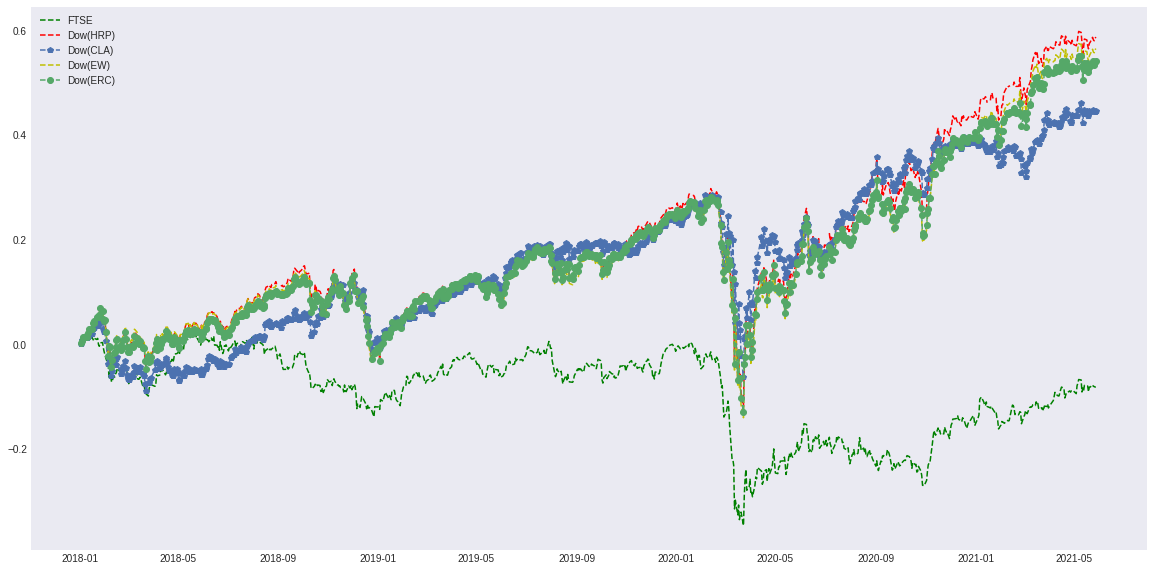

In [128]:
plt.figure(figsize=(20,10))
plt.plot(cumm_daily_returns['FTSE'], 'g--', label="FTSE")
plt.plot(cumm_daily_returns['Dow_HRP'], 'r--', label="Dow(HRP)")
plt.plot(cumm_daily_returns['Dow_CLA'], 'p--', label="Dow(CLA)")
plt.plot(cumm_daily_returns['Dow_EW'], 'y--', label="Dow(EW)")
plt.plot(cumm_daily_returns['Dow_ERC'], 'o--', label="Dow(ERC)")
plt.legend()
plt.show()

In [129]:
sp500
#sp500.to_csv('/Users/apple/Desktop/Second Version/Data/sp500.csv',index = True, header=True)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,267.839996,268.809998,267.399994,268.769989,252.457245,86655700
2018-01-03,268.959991,270.640015,268.959991,270.470001,254.054001,90070400
2018-01-04,271.200012,272.160004,270.540009,271.609985,255.124817,80636400
2018-01-05,272.510010,273.559998,271.950012,273.420013,256.825012,83524000
2018-01-08,273.309998,274.100006,272.980011,273.920013,257.294708,57319200
...,...,...,...,...,...,...
2021-05-24,417.339996,420.320007,417.079987,419.170013,417.803131,51376700
2021-05-25,420.329987,420.709991,417.619995,418.239990,416.876160,57451400
2021-05-26,418.869995,419.609985,417.760010,419.070007,417.703461,43088600


In [130]:
df_500=sp500.copy()

In [131]:
df_500=pd.DataFrame(df_500["Close"])
df_500_return=df_500.pct_change().dropna()
df_500_return

,Close
Date,
2018-01-03,0.006325
2018-01-04,0.004215
2018-01-05,0.006664
2018-01-08,0.001829
2018-01-09,0.002263
...,...
2021-05-24,0.010194
2021-05-25,-0.002219
2021-05-26,0.001985


In [132]:
df_500_return['Dow_HRP']=dow_return['Return_HRP']
df_500_return['Dow_CLA']=dow_return['Return_CLA']
df_500_return['Dow_ERC']=dow_return['Return_ERC']
df_500_return['Dow_EW']=dow_return['Return_EW']
df_500_return

,Close,Dow_HRP,Dow_CLA,Dow_ERC,Dow_EW
Date,,,,,
2018-01-03,0.006325,0.002337,0.001052,0.002020,0.002209
2018-01-04,0.004215,0.003168,0.006344,0.004116,0.004038
2018-01-05,0.006664,0.008048,0.003612,0.006909,0.007447
2018-01-08,0.001829,0.001401,0.001020,0.000787,0.000749
2018-01-09,0.002263,0.000888,0.001082,0.001198,0.001528
...,...,...,...,...,...
2021-05-24,0.010194,0.006076,0.002162,0.005451,0.006145
2021-05-25,-0.002219,-0.002969,-0.001275,-0.003032,-0.003328
2021-05-26,0.001985,-0.001249,-0.000454,-0.001001,-0.000997


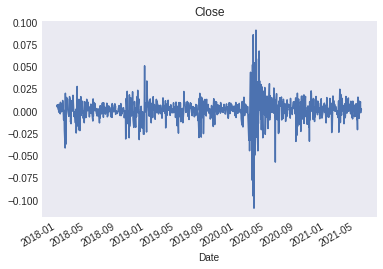

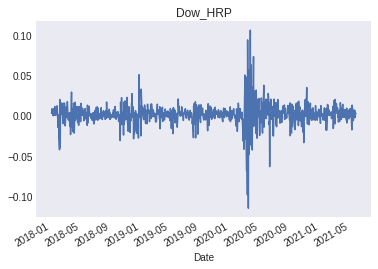

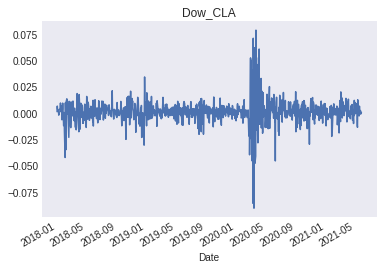

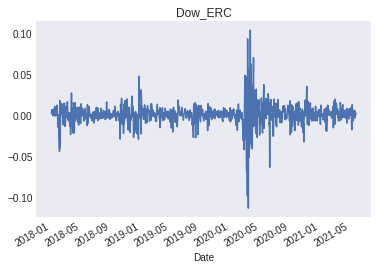

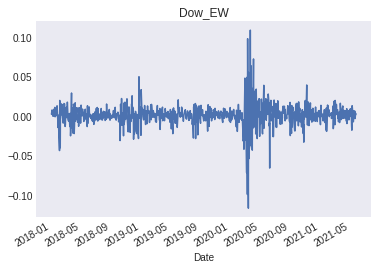

In [133]:
for i, col in enumerate(df_500_return.columns):
    df_500_return[col].plot(fig=plt.figure(i))
    plt.title(col)

plt.show()

<AxesSubplot:xlabel='Date'>

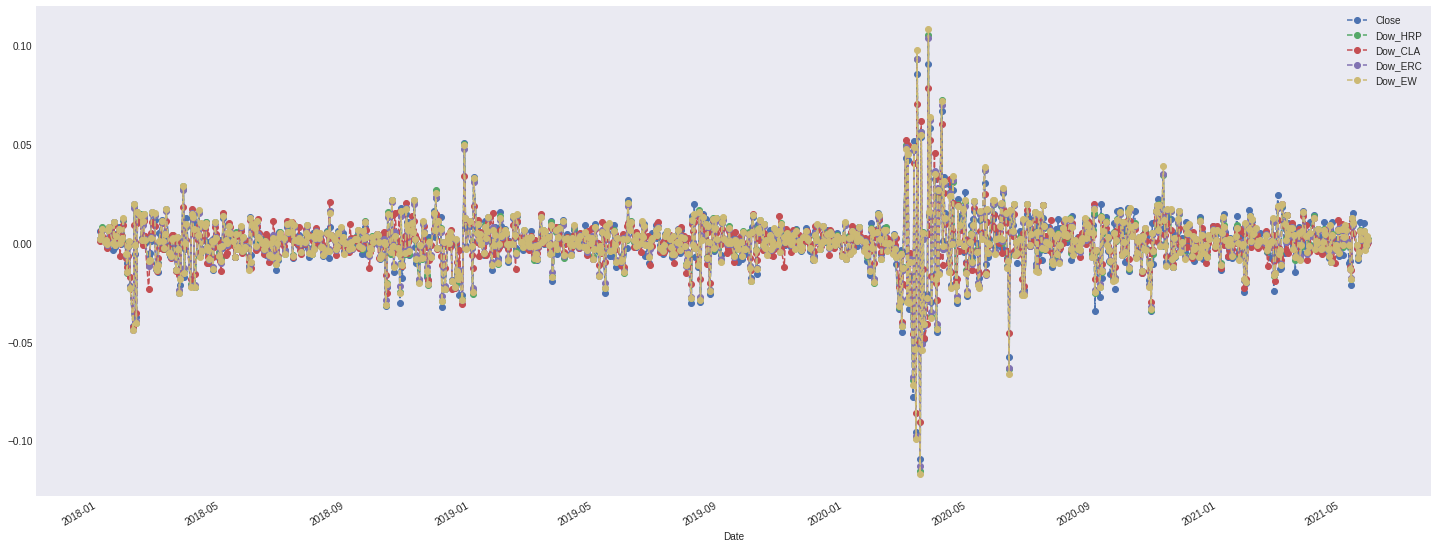

In [134]:
df_500_return.plot(figsize=(25,10),legend=True,linestyle='--',marker='o')

In [135]:
# Calculate the cumulative daily returns
df500_cum_daily_returns = (1 + df_500_return["Close"]).cumprod() - 1
dfhrp_cum_daily_returns = (1 + df_500_return["Dow_HRP"]).cumprod() - 1
dfcla_cum_daily_returns = (1 + df_500_return["Dow_CLA"]).cumprod() - 1
dfew_cum_daily_returns = (1 + df_500_return["Dow_EW"]).cumprod() - 1
dferc_cum_daily_returns = (1 + df_500_return["Dow_ERC"]).cumprod() - 1

In [136]:
cum_daily_returns=pd.DataFrame()
cum_daily_returns=cum_daily_returns.append(df500_cum_daily_returns).append(dfhrp_cum_daily_returns).append(
    dfcla_cum_daily_returns).append(dfew_cum_daily_returns).append(dferc_cum_daily_returns).T
cum_daily_returns=cum_daily_returns.rename(columns = {'Close':'SP500'})

In [137]:
cum_daily_returns

,SP500,Dow_HRP,Dow_CLA,Dow_EW,Dow_ERC
2018-01-03,0.006325,0.002337,0.001052,0.002209,0.002020
2018-01-04,0.010567,0.005513,0.007403,0.006256,0.006144
2018-01-05,0.017301,0.013606,0.011041,0.013750,0.013096
2018-01-08,0.019161,0.015025,0.012073,0.014509,0.013893
2018-01-09,0.021468,0.015926,0.013167,0.016059,0.015108
...,...,...,...,...,...
2021-05-24,0.559586,0.706086,0.529660,0.670185,0.642512
2021-05-25,0.556126,0.701020,0.527709,0.664627,0.637532
2021-05-26,0.559214,0.698896,0.527015,0.662968,0.635893
2021-05-27,0.560033,0.703504,0.526533,0.668929,0.640881


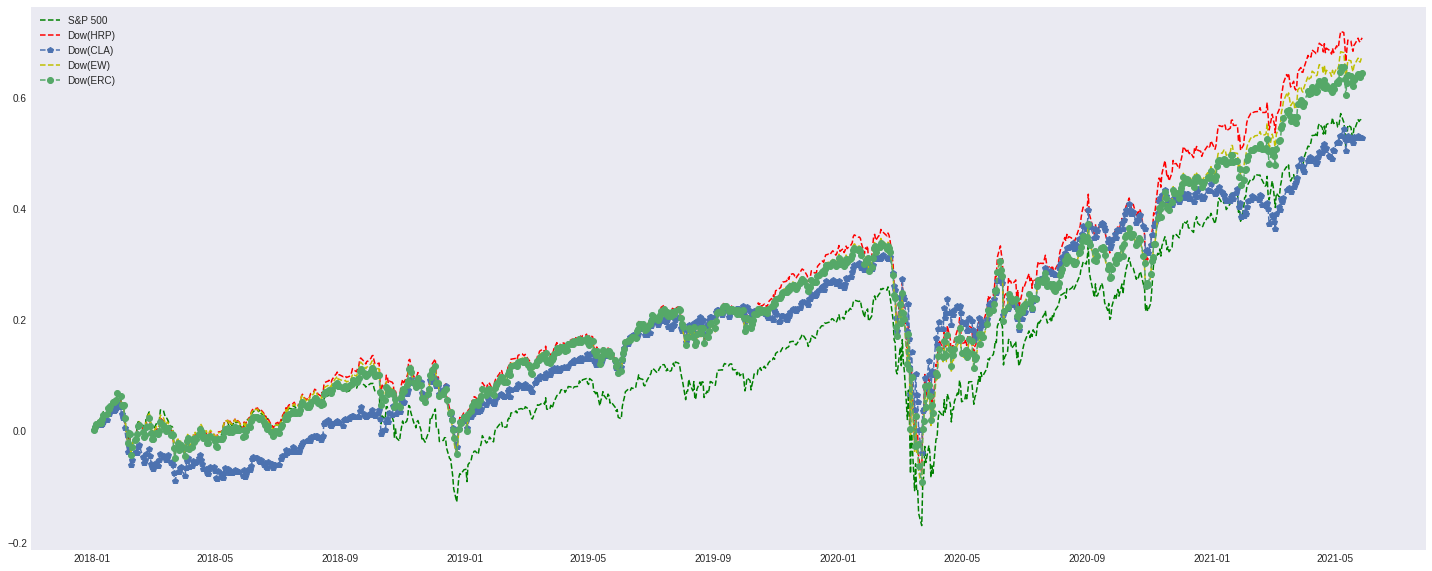

In [138]:
plt.figure(figsize=(25,10))
plt.plot(cum_daily_returns['SP500'], 'g--', label="S&P 500")
plt.plot(cum_daily_returns['Dow_HRP'], 'r--', label="Dow(HRP)")
plt.plot(cum_daily_returns['Dow_CLA'], 'p--', label="Dow(CLA)")
plt.plot(cum_daily_returns['Dow_EW'], 'y--', label="Dow(EW)")
plt.plot(cum_daily_returns['Dow_ERC'], 'o--', label="Dow(ERC)")
plt.legend()
plt.show()

## DOW 30

In [139]:
dow30=pd.DataFrame(dow30["Close"])
dow30_return=dow30.pct_change().dropna()
dow30_return

,Close
Date,
2018-01-03,0.003975
2018-01-04,0.006117
2018-01-05,0.008803
2018-01-08,-0.000509
2018-01-09,0.004066
...,...
2021-05-24,0.005441
2021-05-25,-0.002370
2021-05-26,0.000309


In [140]:
dow30_return['Dow_HRP']=dow_return['Return_HRP']
dow30_return['Dow_CLA']=dow_return['Return_CLA']
dow30_return['Dow_ERC']=dow_return['Return_ERC']
dow30_return['Dow_EW']=dow_return['Return_EW']
dow30_return

,Close,Dow_HRP,Dow_CLA,Dow_ERC,Dow_EW
Date,,,,,
2018-01-03,0.003975,0.002337,0.001052,0.002020,0.002209
2018-01-04,0.006117,0.003168,0.006344,0.004116,0.004038
2018-01-05,0.008803,0.008048,0.003612,0.006909,0.007447
2018-01-08,-0.000509,0.001401,0.001020,0.000787,0.000749
2018-01-09,0.004066,0.000888,0.001082,0.001198,0.001528
...,...,...,...,...,...
2021-05-24,0.005441,0.006076,0.002162,0.005451,0.006145
2021-05-25,-0.002370,-0.002969,-0.001275,-0.003032,-0.003328
2021-05-26,0.000309,-0.001249,-0.000454,-0.001001,-0.000997


In [141]:
dow30_cum_daily_returns = (1 + dow30_return["Close"]).cumprod() - 1
dowhrp_cum_daily_returns = (1 + dow30_return["Dow_HRP"]).cumprod() - 1
dowcla_cum_daily_returns = (1 + dow30_return["Dow_CLA"]).cumprod() - 1
dowew_cum_daily_returns = (1 + dow30_return["Dow_EW"]).cumprod() - 1
dowerc_cum_daily_returns = (1 + dow30_return["Dow_ERC"]).cumprod() - 1

In [142]:
cum_daily_returns=pd.DataFrame()
cum_daily_returns=cum_daily_returns.append(dow30_cum_daily_returns).append(dowhrp_cum_daily_returns).append(
    dowcla_cum_daily_returns).append(dowew_cum_daily_returns).append(dowerc_cum_daily_returns).T
cum_daily_returns=cum_daily_returns.rename(columns = {'Close':'DOW30'})

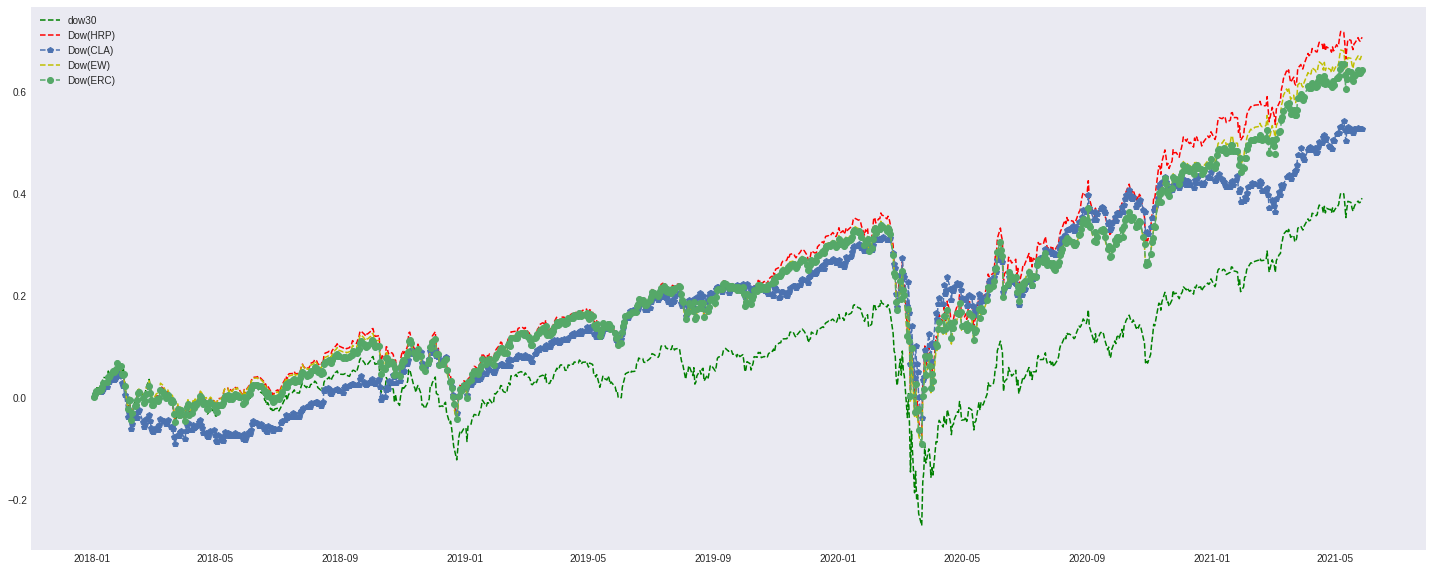

In [143]:
plt.figure(figsize=(25,10))
plt.plot(cum_daily_returns['DOW30'], 'g--', label="dow30")
plt.plot(cum_daily_returns['Dow_HRP'], 'r--', label="Dow(HRP)")
plt.plot(cum_daily_returns['Dow_CLA'], 'p--', label="Dow(CLA)")
plt.plot(cum_daily_returns['Dow_EW'], 'y--', label="Dow(EW)")
plt.plot(cum_daily_returns['Dow_ERC'], 'o--', label="Dow(ERC)")
plt.legend()
plt.show()

# Reference

1. https://github.com/robertmartin8/PyPortfolioOpt CLA
2. https://www.youtube.com/watch?v=9fjs8FeLMJk Data scrapt
3. http://theautomatic.net/yahoo_fin-documentation/#get_quote_data Yahoo_fin package information
4. https://blog.quantinsti.com/quantitative-value-investing-strategy-python/  Data Scrapt
5. https://www.programmersought.com/article/87337253413/ Random Portfolio 
6. https://gmarti.gitlab.io/qfin/2018/10/02/hierarchical-risk-parity-part-1.html HRP
7. https://pyportfolioopt.readthedocs.io/en/latest/OtherOptimizers.html#hierarchical-risk-parity-hrp HRP
8. https://hudsonthames.org/an-introduction-to-the-hierarchical-risk-parity-algorithm/ HRP
9. https://github.com/lcamposgarrido/data-science_projects/blob/master/others/hierarchical_risk_parity/HRP.ipynb HRP
10. https://github.com/jcrichard/pyrb Equal Risk Contribuiton Portfolio